# **Código de Analisis exploratorio 1 - Proyecto de Grado 2025-1**
## **Identificación de contratos públicos sujetos a adiciones en el sector de la salud con modelos de machine learning**

### **Elaborado por:**  
#### Marco Antonio Cruz y Paula Andrea Ovalle
m.cruzg@uniandes.edu.co-202020941 y P.ovallev@uniandes.edu.co-202021735



## Librerias y carga csv

In [6]:
import pandas as pd
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import LabelEncoder
#from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
#### Activar segun quien trabaje 
#Marco
Filepath = "C:/Users/user/OneDrive/Documentos/semestres uniandes/Clases 2025-1/Tesis IIND/Solo sector salud/base con categorias reducidas.csv"
#Paula
#Filepath= "C:/Users/paula/OneDrive/Documentos/10 Semestre/Tesis/base con categorias reducidas.csv"
df=pd.read_csv(Filepath)
df

,nombre entidad,departamento,ciudad,orden,rama,entidad centralizada,estado contrato,codigo de categoria principal,tipo de contrato,modalidad de contratacion,...,adjudicado,id adjudicacion,departamento proveedor,ciudad proveedor,valor total adjudicacion,nombre del adjudicador,nombre del proveedor adjudicado,estado de apertura del proceso,Adicion,tiempo duracion (dias)
0,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,Distrito Capital de Bogotá,Bogotá,Territorial,Corporación Autónoma,Descentralizada,Modificado,V1.85101600,Decreto 092 de 2017,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,1,95.0
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,Modificado,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,No Definido,0,No Adjudicado,Other,Abierto,1,116.0
2,Other,Atlántico,Soledad,Territorial,Ejecutivo,Descentralizada,Modificado,Other,Prestación de servicios,Mínima cuantía,...,Si,Other,Atlántico,Barranquilla,54000000,Other,Other,Cerrado,1,163.0
3,Other,Meta,Villavicencio,Territorial,Ejecutivo,Centralizada,En ejecución,V1.85101600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Meta,Other,0,No Adjudicado,Other,Abierto,0,38.0
4,SUBRED INTEGRADA DE SERVICIO DE SALUD CENTRO O...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487207,Other,Casanare,Yopal,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.80111701,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Casanare,Other,0,No Adjudicado,Other,Abierto,0,30.0
487208,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,Modificado,V1.80111600,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Cundinamarca,No Definido,0,No Adjudicado,Other,Abierto,1,365.0
487209,Other,Nariño,No Definido,Nacional,Ejecutivo,Centralizada,En ejecución,V1.80111600,Prestación de servicios,Contratación directa,...,No,No Adjudicado,Nariño,Other,0,No Adjudicado,Other,Abierto,0,175.0
487210,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogotá,Bogotá,Territorial,Ejecutivo,Descentralizada,En ejecución,V1.85101604,Prestación de servicios,Contratación régimen especial,...,No,No Adjudicado,Distrito Capital de Bogotá,Bogotá,0,No Adjudicado,Other,Abierto,0,119.0


In [8]:
print(list(df.columns))

['nombre entidad', 'departamento', 'ciudad', 'orden', 'rama', 'entidad centralizada', 'estado contrato', 'codigo de categoria principal', 'tipo de contrato', 'modalidad de contratacion', 'justificacion modalidad de contratacion', 'fecha de firma', 'condiciones de entrega', 'es grupo', 'es pyme', 'habilita pago adelantado', 'liquidación', 'obligación ambiental', 'obligaciones postconsumo', 'reversion', 'origen de los recursos', 'destino gasto', 'valor del contrato', 'valor de pago adelantado', 'valor facturado', 'valor pendiente de pago', 'valor pagado', 'valor amortizado', 'valor pendiente de amortizacion', 'valor pendiente de ejecucion', 'estado bpin', 'código bpin', 'anno bpin', 'saldo cdp', 'saldo vigencia', 'espostconflicto', 'dias adicionados', 'puntos del acuerdo', 'pilares del acuerdo', 'nombre representante legal', 'nacionalidad representante legal', 'presupuesto general de la nacion – pgn', 'sistema general de participaciones', 'sistema general de regalías', 'recursos propios 

In [9]:
df["ciudad"].value_counts()

ciudad
Bogotá           250048
Other            116401
No Definido       28156
Cali              23715
Santa Marta       15907
Cartagena          9068
Manizales          8340
Villavicencio      7621
Soacha             5982
Bucaramanga        5889
Cúcuta             5660
Yopal              5390
Soledad            5035
Name: count, dtype: int64

### Analisis exploratorio entender variables

Variable nombre entidad

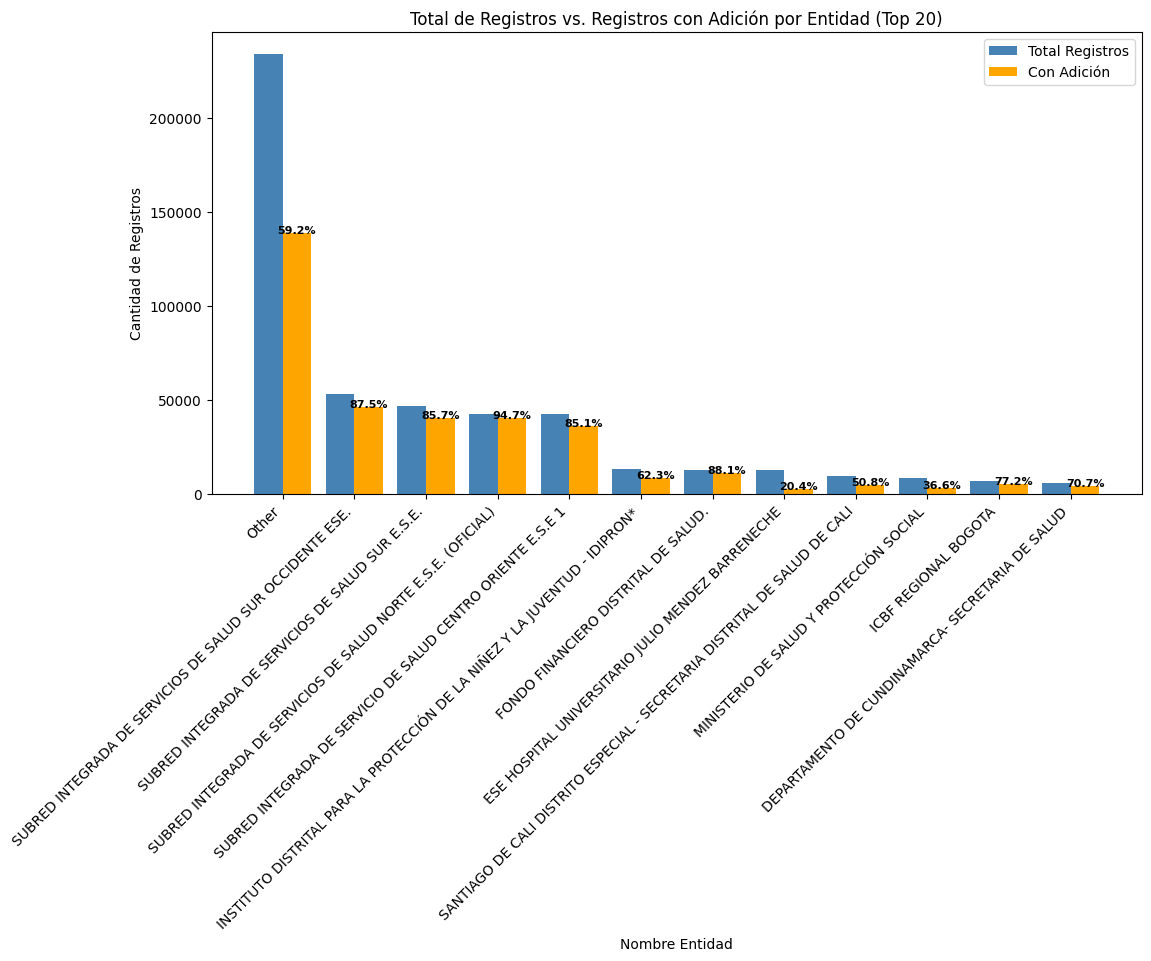

In [98]:

# Contar total de registros por entidad
total_por_entidad = df['nombre entidad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_entidad = df[df['Adicion'] == 1]['nombre entidad'].value_counts()

# Unir ambas series en un DataFrame
df_entidades = pd.DataFrame({'Total Registros': total_por_entidad, 'Con Adición': adicion_por_entidad}).fillna(0)

# Calcular el porcentaje de adición
df_entidades["% Adición"] = (df_entidades["Con Adición"] / df_entidades["Total Registros"]) * 100

# Seleccionar las 20 entidades con más registros
top_entidades = df_entidades.nlargest(20, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_entidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_entidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_entidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_entidades["% Adición"]):
    ax.text(x[i] + width/2, top_entidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=8, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_entidades.index, rotation=45, ha="right")
ax.set_xlabel("Nombre Entidad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad (Top 20)")
ax.legend()

# Mostrar la gráfica
plt.show()



Variable departamento

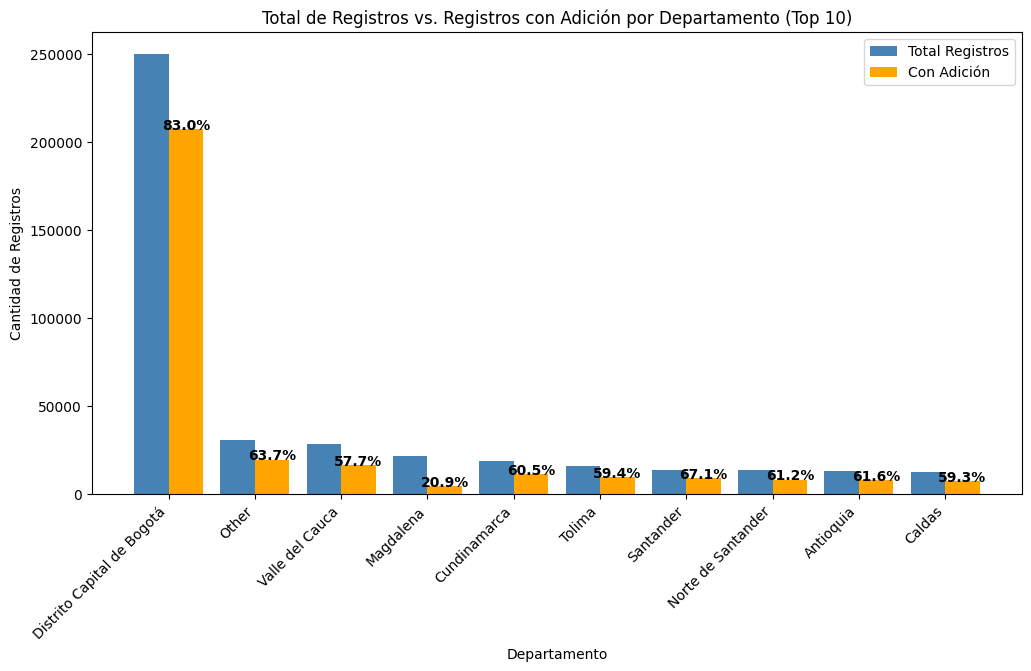

In [99]:


# Contar total de registros por departamento
total_por_departamento = df['departamento'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_departamento = df[df['Adicion'] == 1]['departamento'].value_counts()

# Unir ambas series en un DataFrame
df_departamentos = pd.DataFrame({'Total Registros': total_por_departamento, 'Con Adición': adicion_por_departamento}).fillna(0)

# Calcular el porcentaje de adición
df_departamentos["% Adición"] = (df_departamentos["Con Adición"] / df_departamentos["Total Registros"]) * 100

# Seleccionar los 10 departamentos con más registros
top_departamentos = df_departamentos.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_departamentos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_departamentos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_departamentos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_departamentos["% Adición"]):
    ax.text(x[i] + width/2, top_departamentos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_departamentos.index, rotation=45, ha="right")
ax.set_xlabel("Departamento")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Departamento (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable ciudad

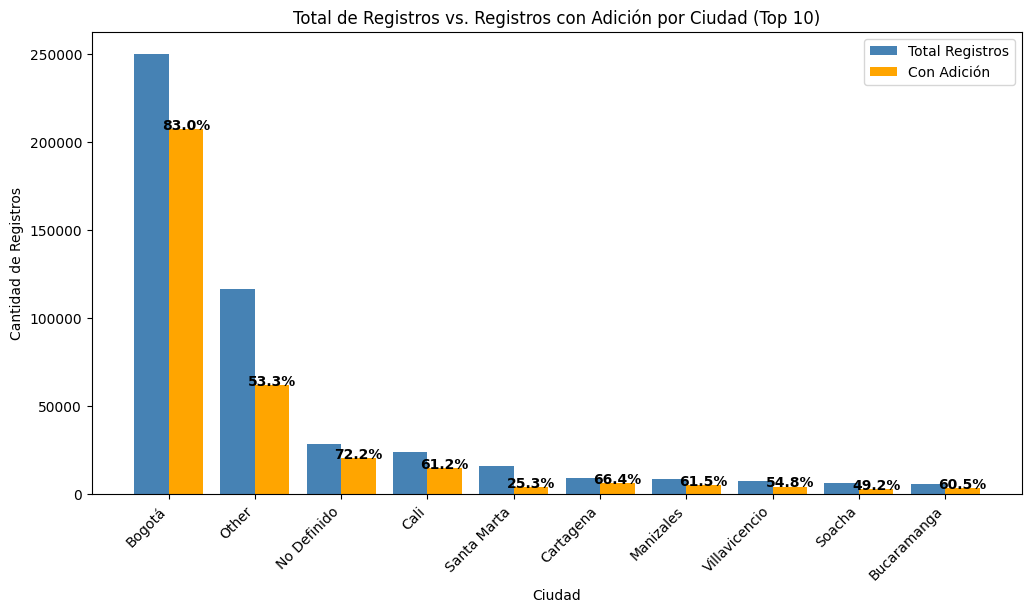

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por ciudad
total_por_ciudad = df['ciudad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_ciudad = df[df['Adicion'] == 1]['ciudad'].value_counts()

# Unir ambas series en un DataFrame
df_ciudades = pd.DataFrame({'Total Registros': total_por_ciudad, 'Con Adición': adicion_por_ciudad}).fillna(0)

# Calcular el porcentaje de adición
df_ciudades["% Adición"] = (df_ciudades["Con Adición"] / df_ciudades["Total Registros"]) * 100

# Seleccionar las 10 ciudades con más registros
top_ciudades = df_ciudades.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ciudades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ciudades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ciudades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ciudades["% Adición"]):
    ax.text(x[i] + width/2, top_ciudades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ciudades.index, rotation=45, ha="right")
ax.set_xlabel("Ciudad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Ciudad (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable orden

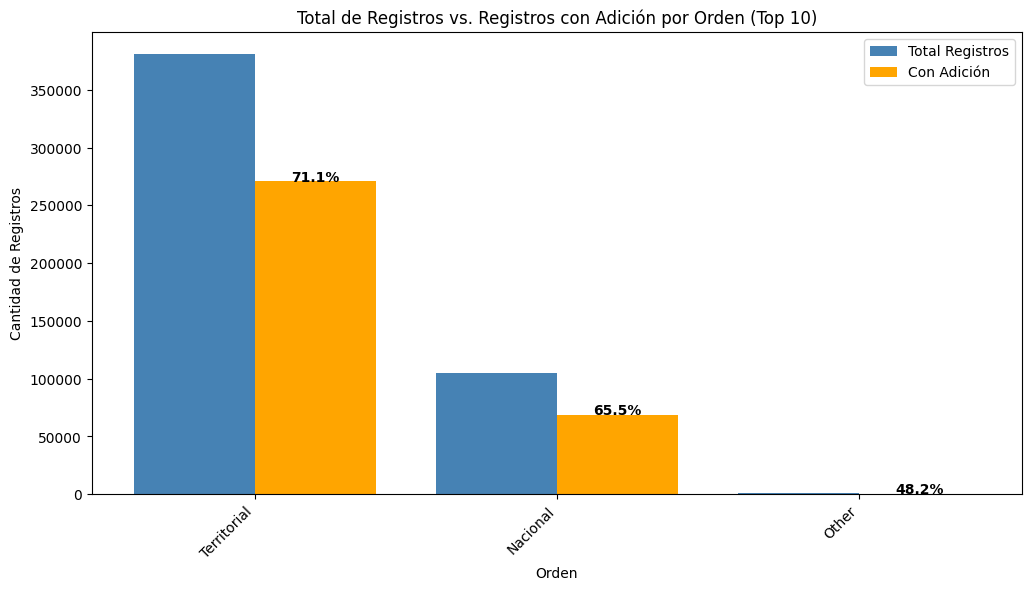

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por orden
total_por_orden = df['orden'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_orden = df[df['Adicion'] == 1]['orden'].value_counts()

# Unir ambas series en un DataFrame
df_orden = pd.DataFrame({'Total Registros': total_por_orden, 'Con Adición': adicion_por_orden}).fillna(0)

# Calcular el porcentaje de adición
df_orden["% Adición"] = (df_orden["Con Adición"] / df_orden["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_orden = df_orden.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_orden))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_orden['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_orden['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_orden["% Adición"]):
    ax.text(x[i] + width/2, top_orden["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_orden.index, rotation=45, ha="right")
ax.set_xlabel("Orden")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Orden (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable rama

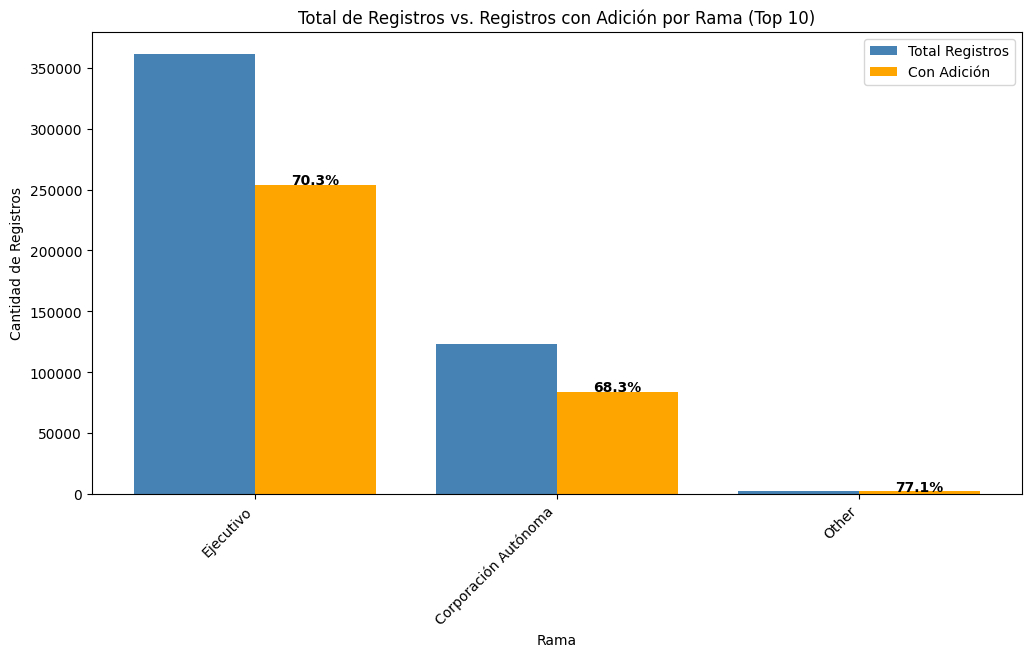

In [102]:

# Contar total de registros por rama
total_por_rama = df['rama'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_rama = df[df['Adicion'] == 1]['rama'].value_counts()

# Unir ambas series en un DataFrame
df_rama = pd.DataFrame({'Total Registros': total_por_rama, 'Con Adición': adicion_por_rama}).fillna(0)

# Calcular el porcentaje de adición
df_rama["% Adición"] = (df_rama["Con Adición"] / df_rama["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_ramas = df_rama.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_ramas))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_ramas['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_ramas['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_ramas["% Adición"]):
    ax.text(x[i] + width/2, top_ramas["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_ramas.index, rotation=45, ha="right")
ax.set_xlabel("Rama")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Rama (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


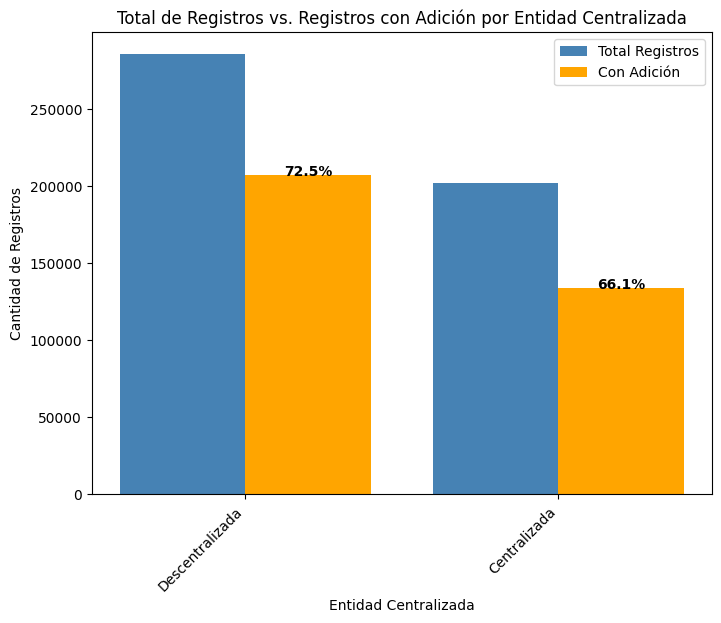

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por entidad centralizada
total_por_centralizada = df['entidad centralizada'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_centralizada = df[df['Adicion'] == 1]['entidad centralizada'].value_counts()

# Unir ambas series en un DataFrame
df_centralizada = pd.DataFrame({'Total Registros': total_por_centralizada, 'Con Adición': adicion_por_centralizada}).fillna(0)

# Calcular el porcentaje de adición
df_centralizada["% Adición"] = (df_centralizada["Con Adición"] / df_centralizada["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_centralizada))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_centralizada['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_centralizada['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_centralizada["% Adición"]):
    ax.text(x[i] + width/2, df_centralizada["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_centralizada.index, rotation=45, ha="right")
ax.set_xlabel("Entidad Centralizada")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Entidad Centralizada")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable estado contrato

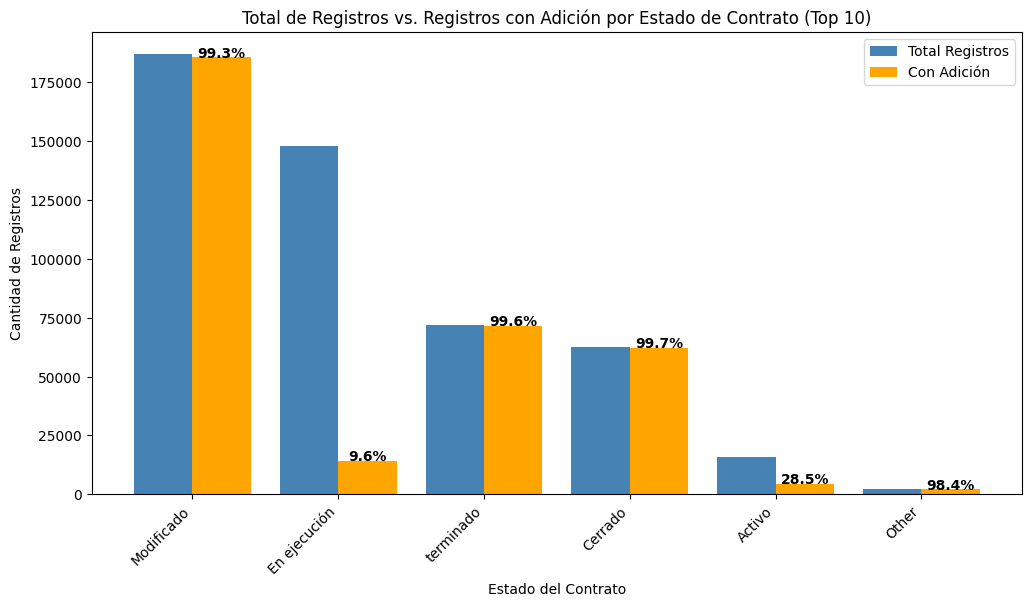

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por estado contrato
total_por_estado = df['estado contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_estado = df[df['Adicion'] == 1]['estado contrato'].value_counts()

# Unir ambas series en un DataFrame
df_estado = pd.DataFrame({'Total Registros': total_por_estado, 'Con Adición': adicion_por_estado}).fillna(0)

# Calcular el porcentaje de adición
df_estado["% Adición"] = (df_estado["Con Adición"] / df_estado["Total Registros"]) * 100

# Seleccionar las categorías con más registros
top_estados = df_estado.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_estados))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_estados['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_estados['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_estados["% Adición"]):
    ax.text(x[i] + width/2, top_estados["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_estados.index, rotation=45, ha="right")
ax.set_xlabel("Estado del Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Estado de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable codigo de categoria principal

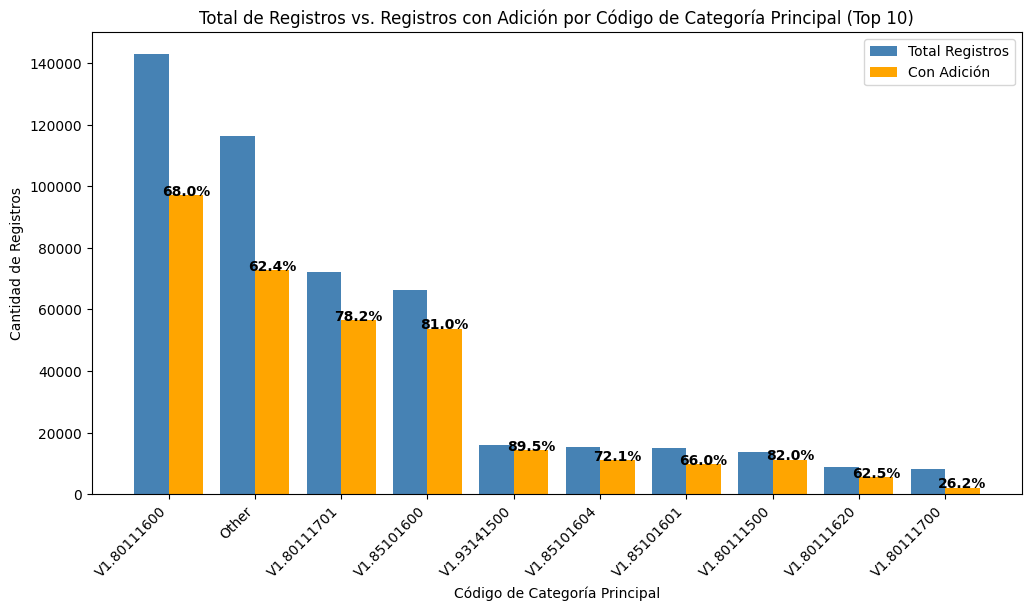

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por código de categoría principal
total_por_categoria = df['codigo de categoria principal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_categoria = df[df['Adicion'] == 1]['codigo de categoria principal'].value_counts()

# Unir ambas series en un DataFrame
df_categoria = pd.DataFrame({'Total Registros': total_por_categoria, 'Con Adición': adicion_por_categoria}).fillna(0)

# Calcular el porcentaje de adición
df_categoria["% Adición"] = (df_categoria["Con Adición"] / df_categoria["Total Registros"]) * 100

# Seleccionar las 10 categorías con más registros
top_categorias = df_categoria.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_categorias))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_categorias['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_categorias['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_categorias["% Adición"]):
    ax.text(x[i] + width/2, top_categorias["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_categorias.index, rotation=45, ha="right")
ax.set_xlabel("Código de Categoría Principal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Código de Categoría Principal (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable tipo de contrato

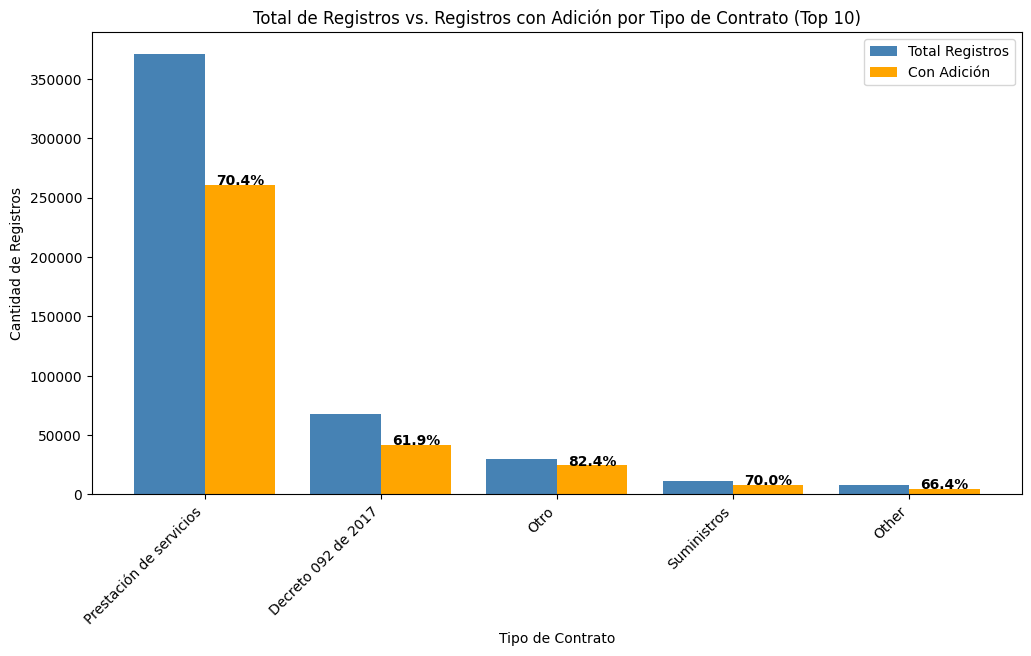

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Contar total de registros por tipo de contrato
total_por_tipo = df['tipo de contrato'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_tipo = df[df['Adicion'] == 1]['tipo de contrato'].value_counts()

# Unir ambas series en un DataFrame
df_tipo_contrato = pd.DataFrame({'Total Registros': total_por_tipo, 'Con Adición': adicion_por_tipo}).fillna(0)

# Calcular el porcentaje de adición
df_tipo_contrato["% Adición"] = (df_tipo_contrato["Con Adición"] / df_tipo_contrato["Total Registros"]) * 100

# Seleccionar los 10 tipos de contrato con más registros
top_tipos = df_tipo_contrato.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_tipos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_tipos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_tipos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_tipos["% Adición"]):
    ax.text(x[i] + width/2, top_tipos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_tipos.index, rotation=45, ha="right")
ax.set_xlabel("Tipo de Contrato")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Tipo de Contrato (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()




Variable modalidad de contratacion

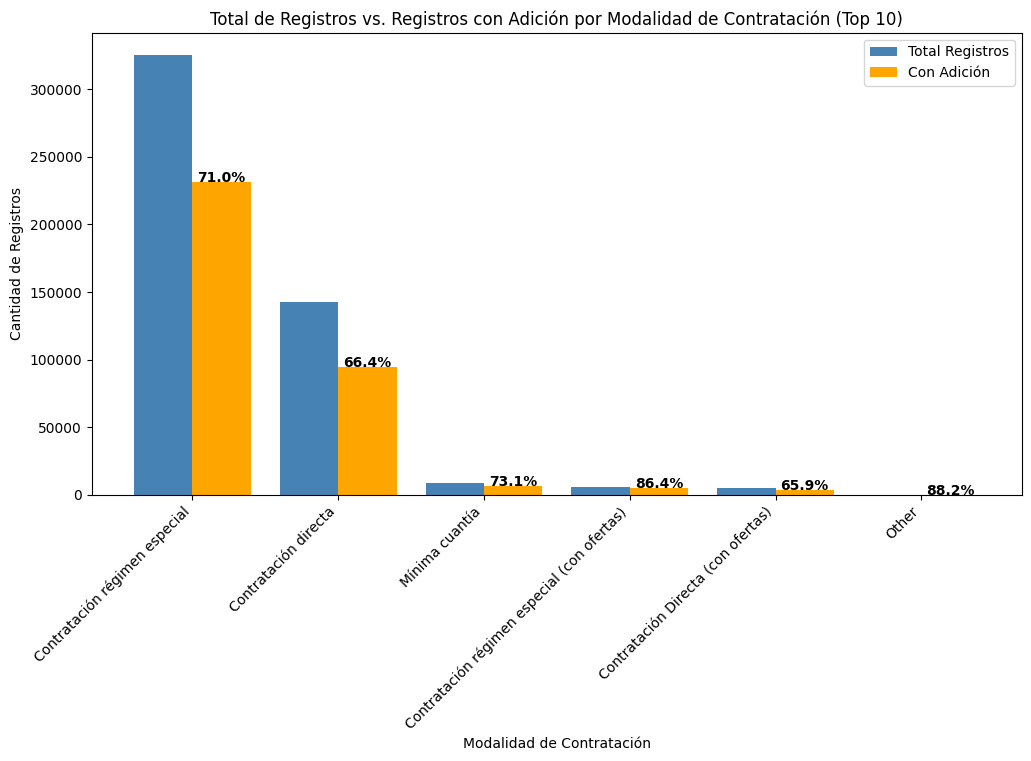

In [107]:


# Contar total de registros por modalidad de contratación
total_por_modalidad = df['modalidad de contratacion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_modalidad = df[df['Adicion'] == 1]['modalidad de contratacion'].value_counts()

# Unir ambas series en un DataFrame
df_modalidad = pd.DataFrame({'Total Registros': total_por_modalidad, 'Con Adición': adicion_por_modalidad}).fillna(0)

# Calcular el porcentaje de adición
df_modalidad["% Adición"] = (df_modalidad["Con Adición"] / df_modalidad["Total Registros"]) * 100

# Seleccionar las 10 modalidades con más registros
top_modalidades = df_modalidad.nlargest(10, 'Total Registros')

# Configurar las posiciones de las barras
x = np.arange(len(top_modalidades))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, top_modalidades['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, top_modalidades['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(top_modalidades["% Adición"]):
    ax.text(x[i] + width/2, top_modalidades["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(top_modalidades.index, rotation=45, ha="right")
ax.set_xlabel("Modalidad de Contratación")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Modalidad de Contratación (Top 10)")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable justificacion modalidad de contratacion

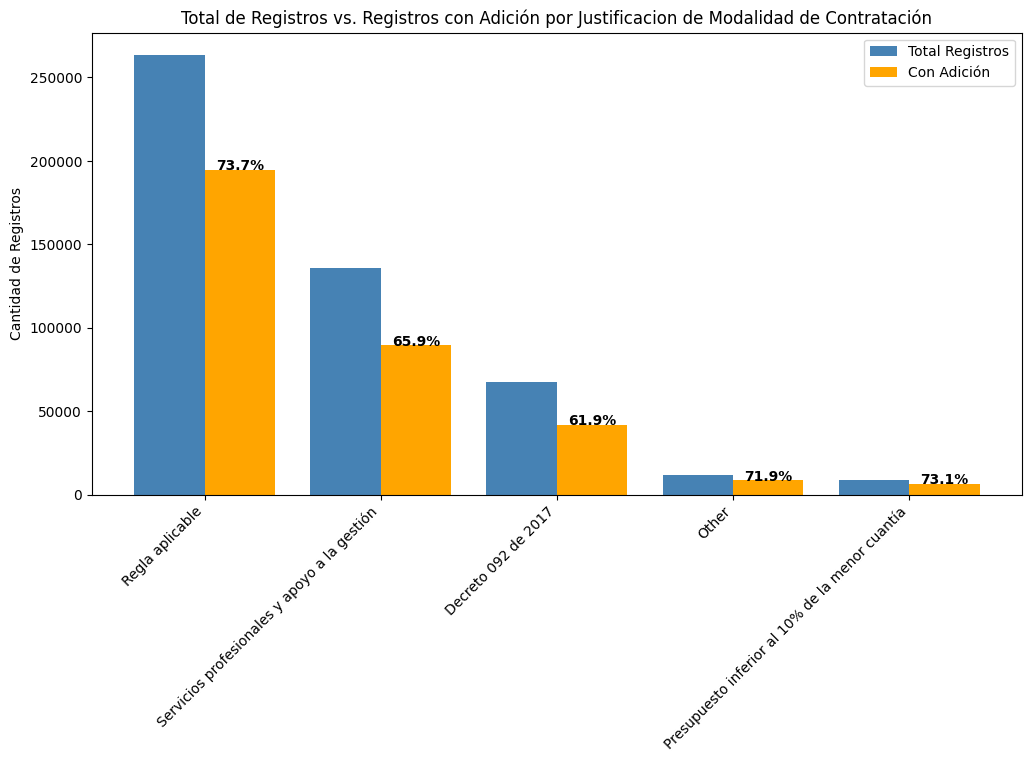

In [108]:


# Contar total de registros por modalidad de justificacion
total_por_justificacion= df['justificacion modalidad de contratacion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_justificacion = df[df['Adicion'] == 1]['justificacion modalidad de contratacion'].value_counts()

# Unir ambas series en un DataFrame
df_justificacion = pd.DataFrame({'Total Registros': total_por_justificacion, 'Con Adición': adicion_por_justificacion}).fillna(0)

# Calcular el porcentaje de adición
df_justificacion["% Adición"] = (df_justificacion["Con Adición"] / df_justificacion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_justificacion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_justificacion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_justificacion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_justificacion["% Adición"]):
    ax.text(x[i] + width/2, df_justificacion["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_justificacion.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Justificacion de Modalidad de Contratación")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable condiciones de entrega

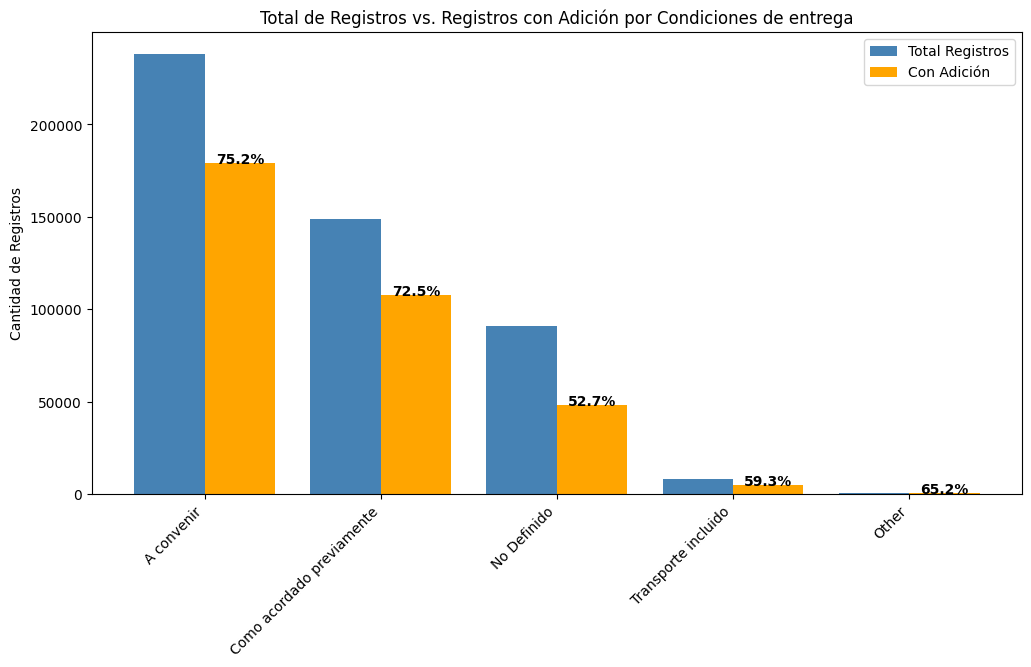

In [109]:
#Contar total de registros por condiciones de entrega
total_por_entrega = df['condiciones de entrega'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_entrega= df[df['Adicion'] == 1]['condiciones de entrega'].value_counts()

# Unir ambas series en un DataFrame
df_entrega = pd.DataFrame({'Total Registros': total_por_entrega, 'Con Adición': adicion_por_entrega}).fillna(0)

# Calcular el porcentaje de adición
df_entrega["% Adición"] = (df_entrega["Con Adición"] / df_entrega["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_entrega))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_entrega['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_entrega['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_entrega["% Adición"]):
    ax.text(x[i] + width/2, df_entrega["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_entrega.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Condiciones de entrega")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable es grupo

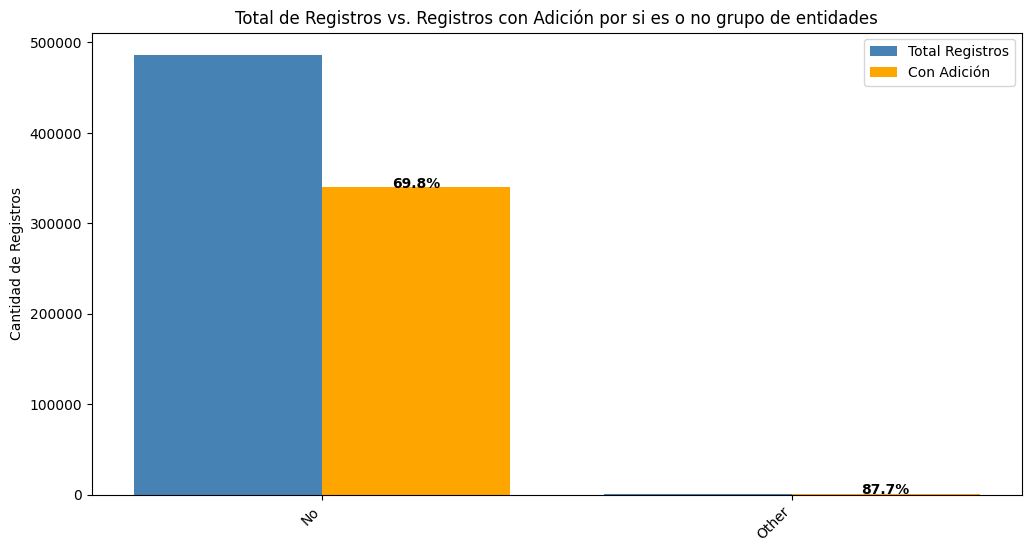

In [110]:


# Contar total de registros por si es o no grupo
total_por_grupo = df['es grupo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_grupo = df[df['Adicion'] == 1]['es grupo'].value_counts()

# Unir ambas series en un DataFrame
df_grupo = pd.DataFrame({'Total Registros': total_por_grupo, 'Con Adición': adicion_por_grupo}).fillna(0)

# Calcular el porcentaje de adición
df_grupo["% Adición"] = (df_grupo["Con Adición"] / df_grupo["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_grupo))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_grupo['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_grupo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_grupo["% Adición"]):
    ax.text(x[i] + width/2, df_grupo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_grupo.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si es o no grupo de entidades")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable es pyme

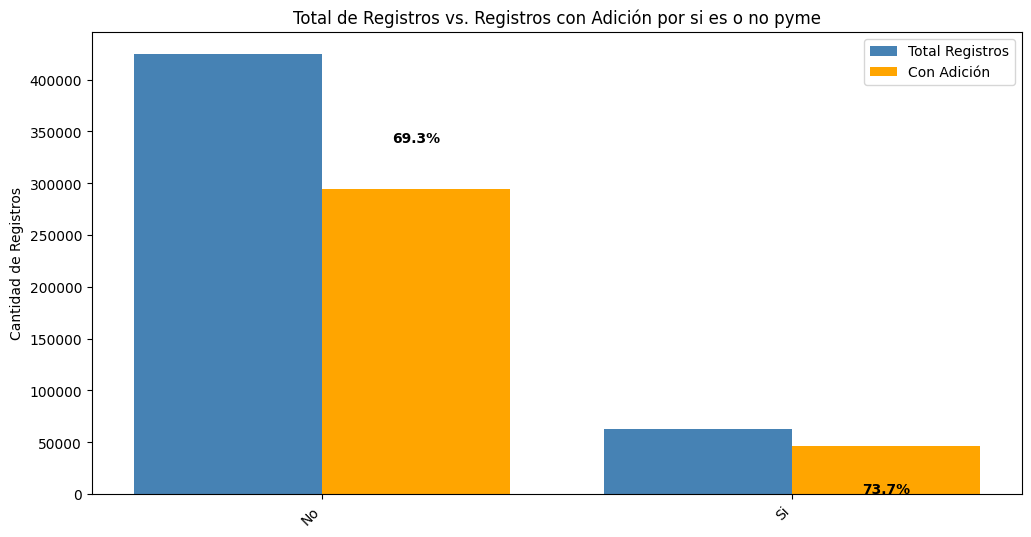

In [111]:


# Contar total de registros por si es o no pymes
total_por_pyme = df['es pyme'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_pyme = df[df['Adicion'] == 1]['es pyme'].value_counts()

# Unir ambas series en un DataFrame
df_pyme = pd.DataFrame({'Total Registros': total_por_pyme, 'Con Adición': adicion_por_pyme}).fillna(0)

# Calcular el porcentaje de adición
df_pyme["% Adición"] = (df_pyme["Con Adición"] / df_pyme["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_pyme))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_pyme['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_pyme['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_pyme["% Adición"]):
    ax.text(x[i] + width/2, df_grupo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_pyme.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si es o no pyme")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable liquidación

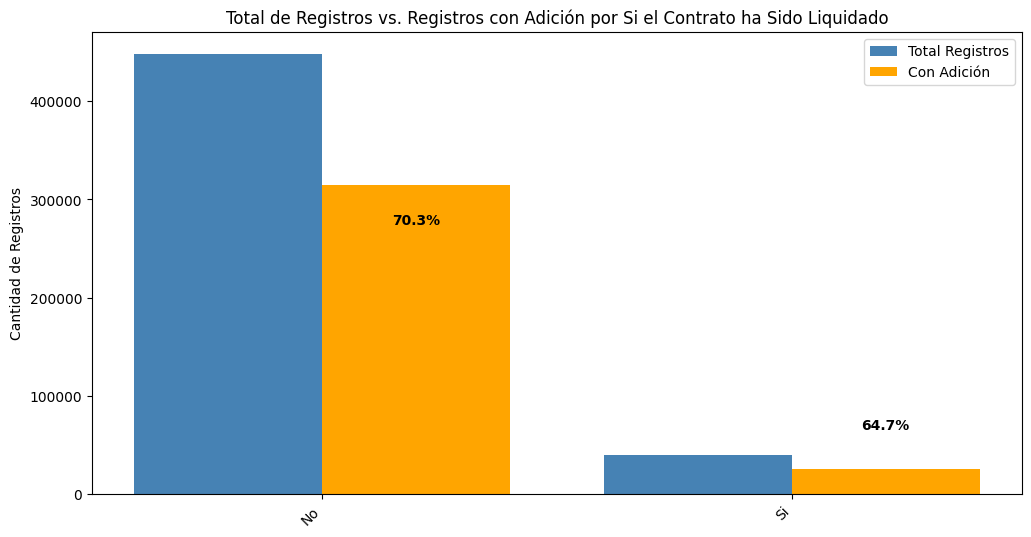

In [114]:
#Contar total de registros por si el contratado ha sido liquidado
total_por_liquidacion= df['liquidación'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_liquidacion = df[df['Adicion'] == 1]['liquidación'].value_counts()

# Unir ambas series en un DataFrame
df_liquidacion = pd.DataFrame({'Total Registros': total_por_liquidacion, 'Con Adición': adicion_por_liquidacion}).fillna(0)

# Calcular el porcentaje de adición
df_liquidacion["% Adición"] = (df_liquidacion["Con Adición"] / df_liquidacion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_liquidacion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_liquidacion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_liquidacion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_liquidacion["% Adición"]):
    ax.text(x[i] + width/2, df_pagoad["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_liquidacion.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Si el Contrato ha Sido Liquidado")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable obligación ambiental

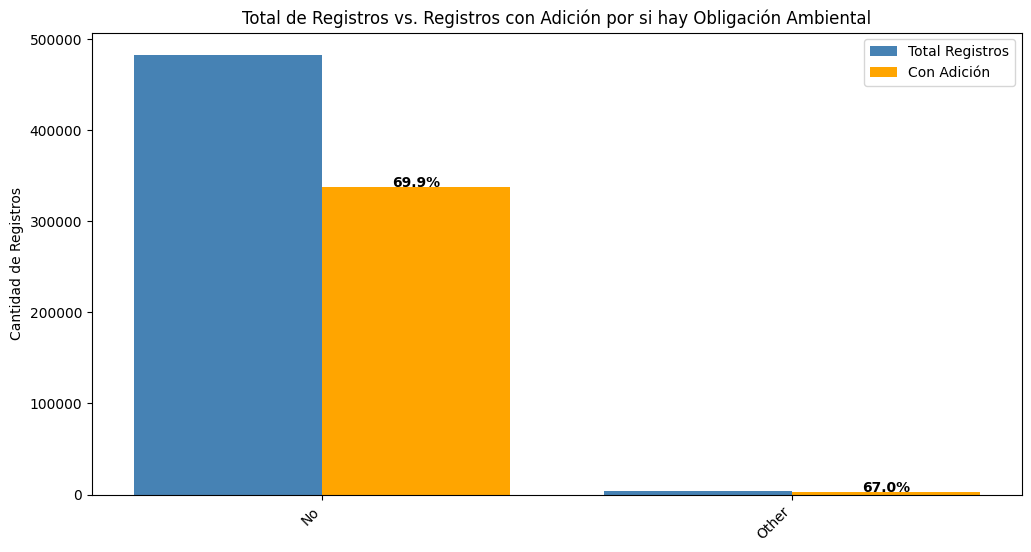

In [115]:
#Contar total de registros por si hay obligacion ambiental
total_por_obambiental = df['obligación ambiental'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_obambiental = df[df['Adicion'] == 1]['obligación ambiental'].value_counts()

# Unir ambas series en un DataFrame
df_obambiental = pd.DataFrame({'Total Registros': total_por_obambiental, 'Con Adición': adicion_por_obambiental}).fillna(0)

# Calcular el porcentaje de adición
df_obambiental["% Adición"] = (df_obambiental["Con Adición"] / df_obambiental["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_obambiental))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_obambiental['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_obambiental['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_obambiental["% Adición"]):
    ax.text(x[i] + width/2, df_obambiental["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_obambiental.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si hay Obligación Ambiental")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable obligaciones postconsumo

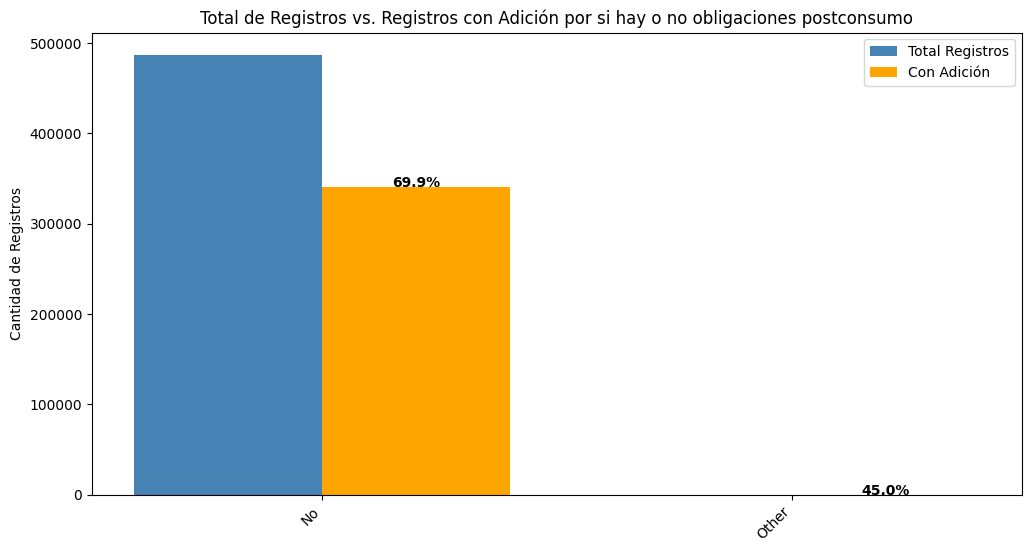

In [116]:
#Contar total de registros por si hay obligaciones postconsumo
total_por_postconsumo = df['obligaciones postconsumo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_postconsumo = df[df['Adicion'] == 1]['obligaciones postconsumo'].value_counts()

# Unir ambas series en un DataFrame
df_postconsumo = pd.DataFrame({'Total Registros': total_por_postconsumo, 'Con Adición': adicion_por_postconsumo}).fillna(0)

# Calcular el porcentaje de adición
df_postconsumo["% Adición"] = (df_postconsumo["Con Adición"] / df_postconsumo["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_postconsumo))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_postconsumo['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_postconsumo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_postconsumo["% Adición"]):
    ax.text(x[i] + width/2, df_postconsumo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_postconsumo.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por si hay o no obligaciones postconsumo")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable reversion

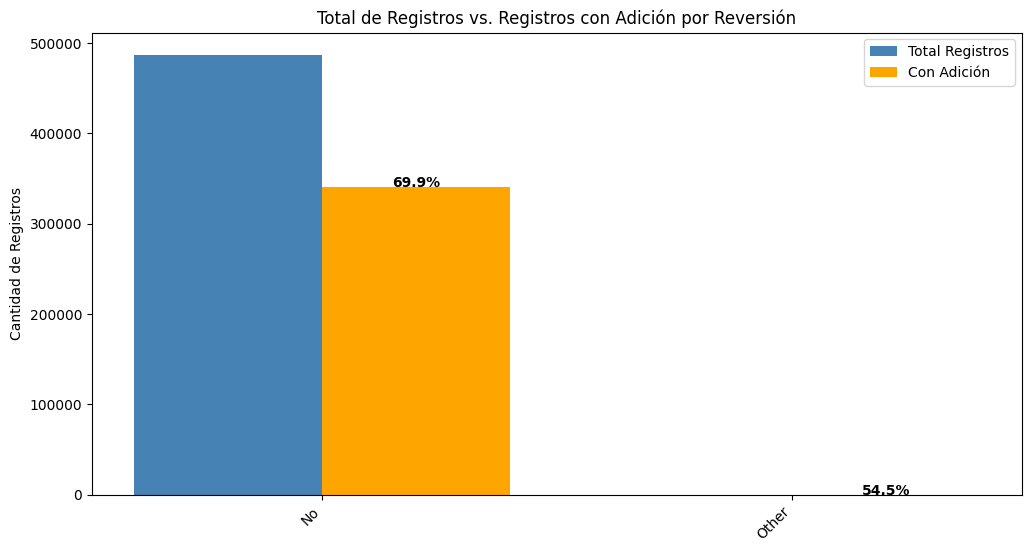

In [121]:
#Contar total de registros por reversion
total_por_reversion = df['reversion'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_reversion= df[df['Adicion'] == 1]['reversion'].value_counts()

# Unir ambas series en un DataFrame
df_reversion = pd.DataFrame({'Total Registros': total_por_reversion, 'Con Adición': adicion_por_reversion}).fillna(0)

# Calcular el porcentaje de adición
df_reversion["% Adición"] = (df_reversion["Con Adición"] / df_reversion["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_reversion))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_reversion['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_reversion['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_reversion["% Adición"]):
    ax.text(x[i] + width/2, df_reversion["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_reversion.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Reversión")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable origen de los recursos

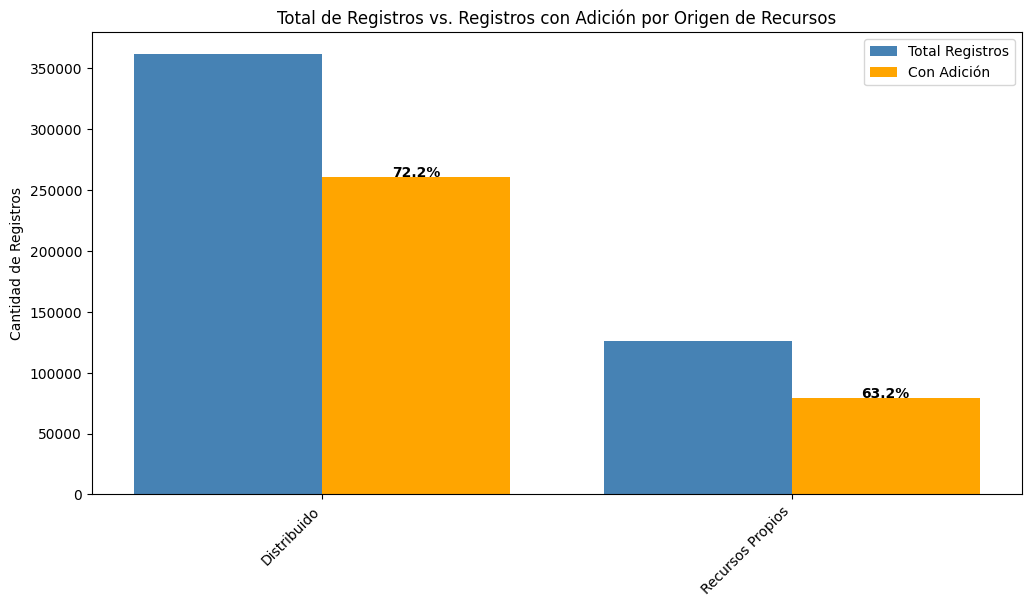

In [ ]:
#Contar total de registros por origen de recursos
total_por_recursos = df['origen de los recursos'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_recursos= df[df['Adicion'] == 1]['origen de los recursos'].value_counts()

# Unir ambas series en un DataFrame
df_recursos = pd.DataFrame({'Total Registros': total_por_recursos, 'Con Adición': adicion_por_recursos}).fillna(0)

# Calcular el porcentaje de adición
df_recursos["% Adición"] = (df_recursos["Con Adición"] / df_recursos["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_recursos))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_recursos['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_recursos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_recursos["% Adición"]):
    ax.text(x[i] + width/2, df_recursos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_recursos.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Origen de Recursos")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable destino gasto

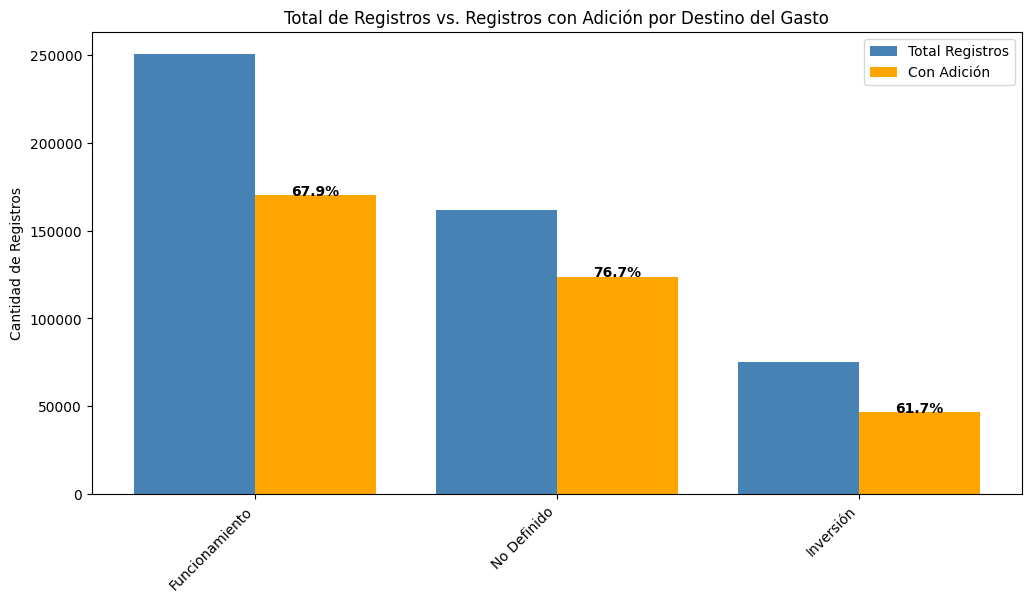

In [ ]:
#Contar total de registros por destino del gasto
total_por_destino= df['destino gasto'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_destino = df[df['Adicion'] == 1]['destino gasto'].value_counts()

# Unir ambas series en un DataFrame
df_destino= pd.DataFrame({'Total Registros': total_por_destino, 'Con Adición': adicion_por_destino}).fillna(0)

# Calcular el porcentaje de adición
df_destino["% Adición"] = (df_destino["Con Adición"] / df_destino["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_destino))
width = 0.4  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_destino['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_destino['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_destino["% Adición"]):
    ax.text(x[i] + width/2, df_destino["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_destino.index, rotation=45, ha="right")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Destino del Gasto")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable valor del contrato

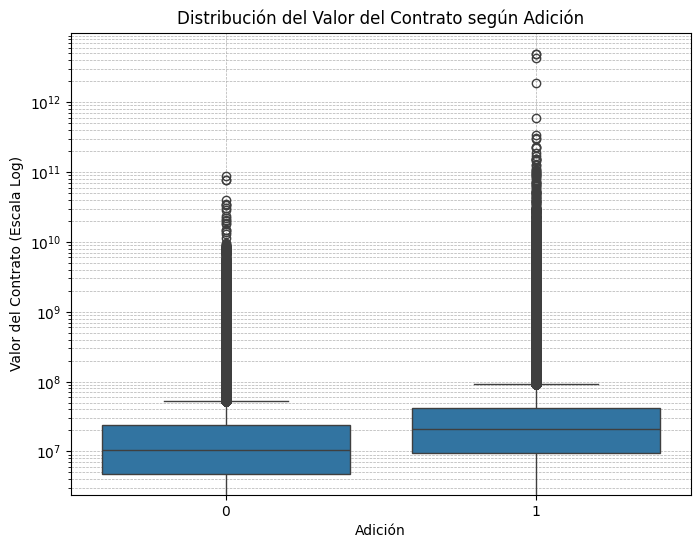

In [ ]:

# Convertir 'valor del contrato' a numérico (en caso de que tenga caracteres como comas o símbolos)
df['valor del contrato'] = pd.to_numeric(df['valor del contrato'], errors='coerce')

# Crear el boxplot comparando contratos con y sin adición
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor del contrato', data=df)
plt.yscale('log')  # Escala logarítmica por si hay valores muy altos que distorsionen el gráfico
plt.xlabel('Adición')
plt.ylabel('Valor del Contrato (Escala Log)')
plt.title('Distribución del Valor del Contrato según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


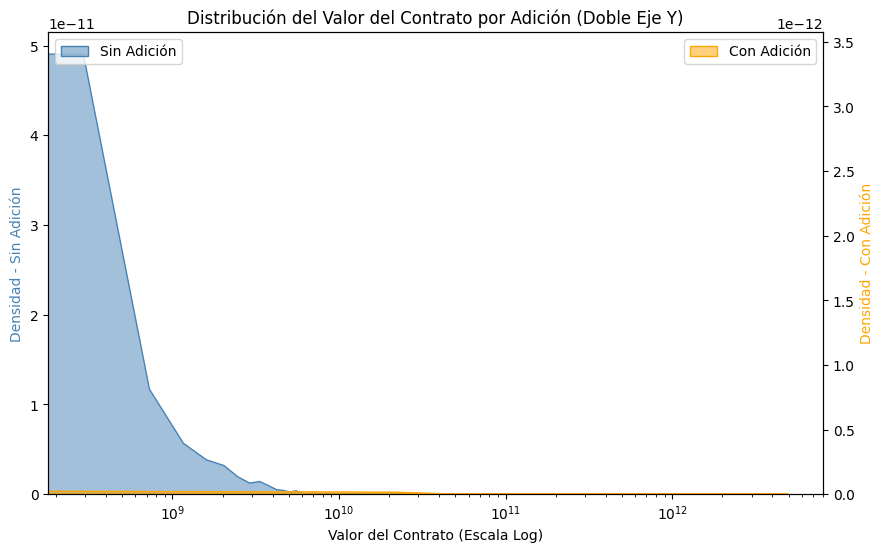

In [ ]:


# Asegurar que 'valor del contrato' es numérico
df['valor del contrato'] = pd.to_numeric(df['valor del contrato'], errors='coerce')

# Filtrar NaN en valor del contrato
df_valido = df[['valor del contrato', 'Adicion']].dropna()

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje secundario
ax2 = ax1.twinx()

# Densidad para Adición = 0
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor del contrato'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')

# Densidad para Adición = 1
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor del contrato'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')
ax2.set_ylabel('Densidad - Con Adición', color='orange')

# Escala logarítmica en X
ax1.set_xscale('log')
ax2.set_xscale('log')

# Configurar título y etiquetas
ax1.set_xlabel('Valor del Contrato (Escala Log)')
ax1.set_title('Distribución del Valor del Contrato por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()



Variable valor de pago adelantado

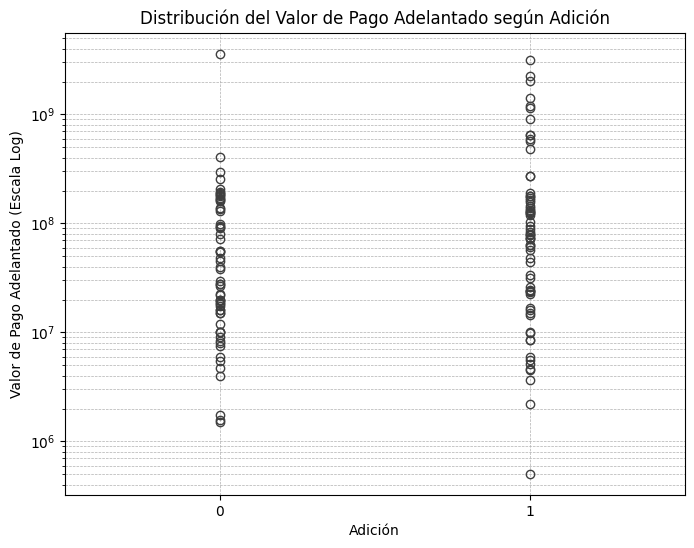

In [ ]:
# Asegurar que 'valor de pago adelantado' es numérico
df['valor de pago adelantado'] = pd.to_numeric(df['valor de pago adelantado'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor de pago adelantado', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor de pago adelantado', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor de Pago Adelantado (Escala Log)')
plt.title('Distribución del Valor de Pago Adelantado según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


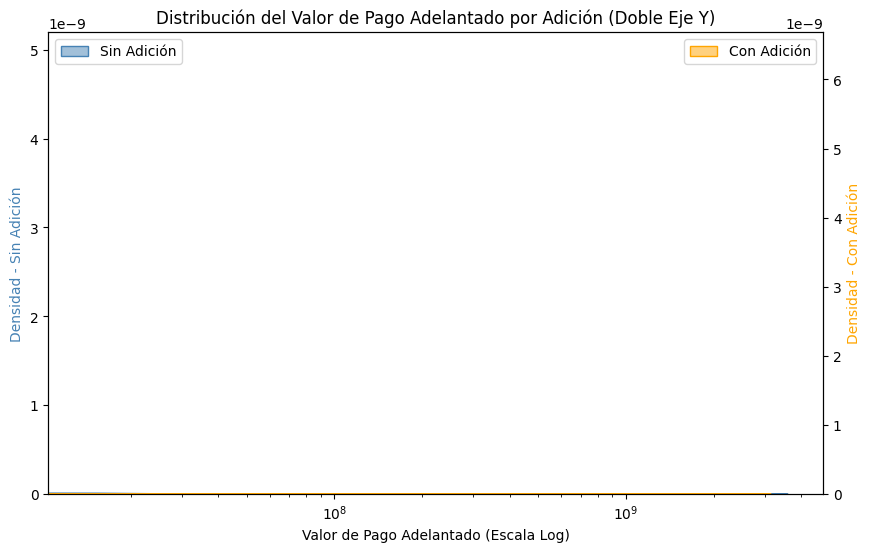

In [ ]:

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor de pago adelantado'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor de pago adelantado'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor de Pago Adelantado (Escala Log)')
ax1.set_title('Distribución del Valor de Pago Adelantado por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()



Variable valor facturado


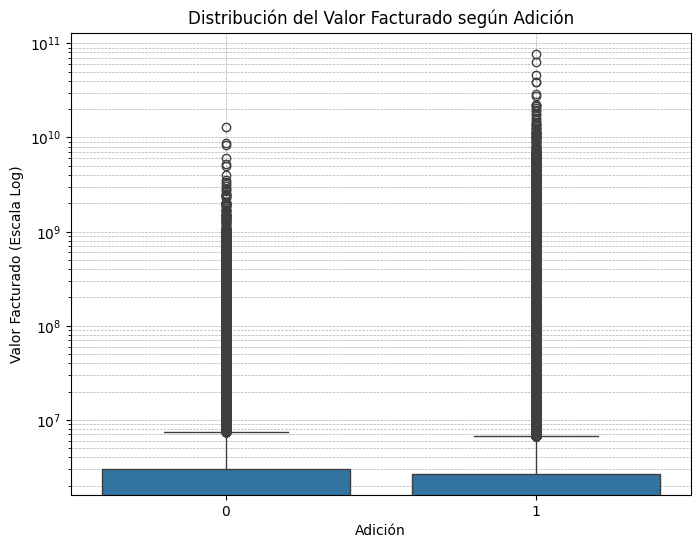

In [ ]:

# Asegurar que 'valor facturado' es numérico
df['valor facturado'] = pd.to_numeric(df['valor facturado'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor facturado', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor facturado', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Facturado (Escala Log)')
plt.title('Distribución del Valor Facturado según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


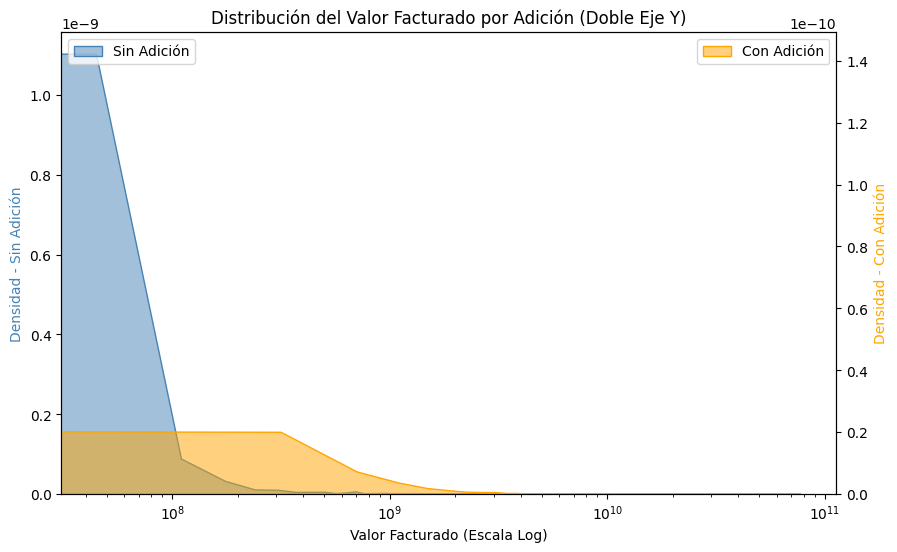

In [ ]:


# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor facturado'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor facturado'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Facturado (Escala Log)')
ax1.set_title('Distribución del Valor Facturado por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable valor pendiente de pago

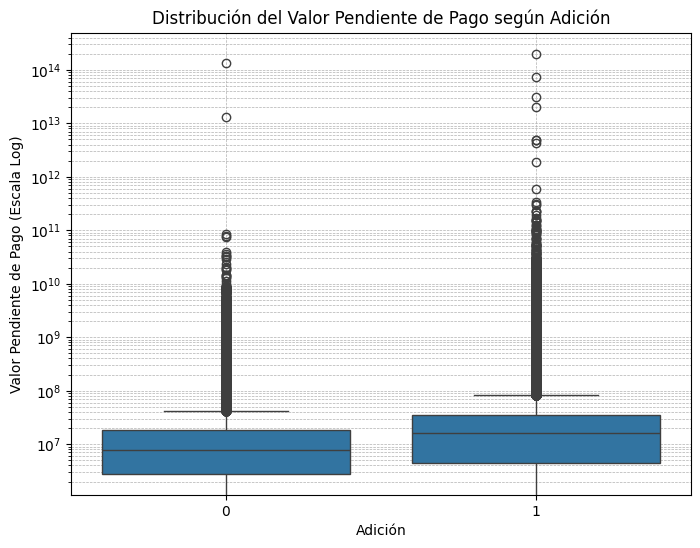

In [ ]:
# Asegurar que 'valor pendiente de pago' es numérico
df['valor pendiente de pago'] = pd.to_numeric(df['valor pendiente de pago'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pendiente de pago', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de pago', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Pago (Escala Log)')
plt.title('Distribución del Valor Pendiente de Pago según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


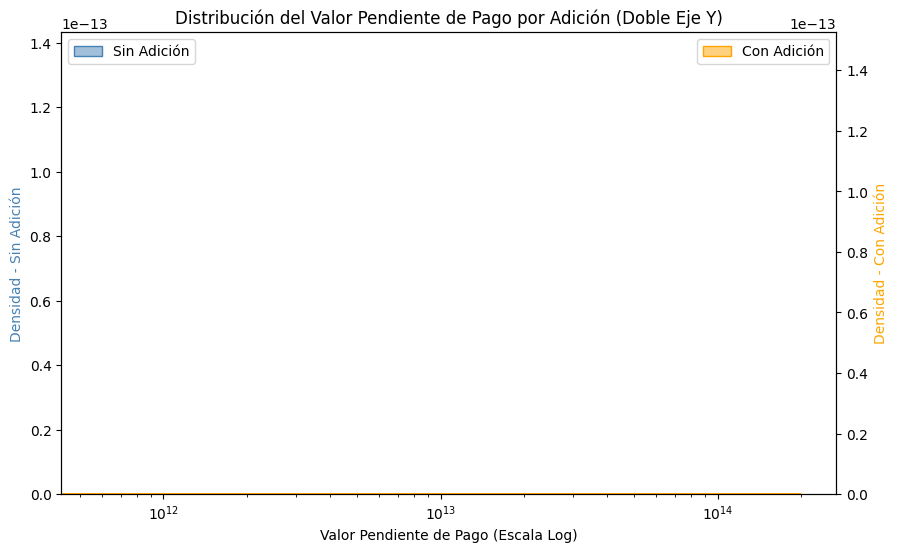

In [ ]:


# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor pendiente de pago'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor pendiente de pago'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Pendiente de Pago (Escala Log)')
ax1.set_title('Distribución del Valor Pendiente de Pago por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable valor pagado

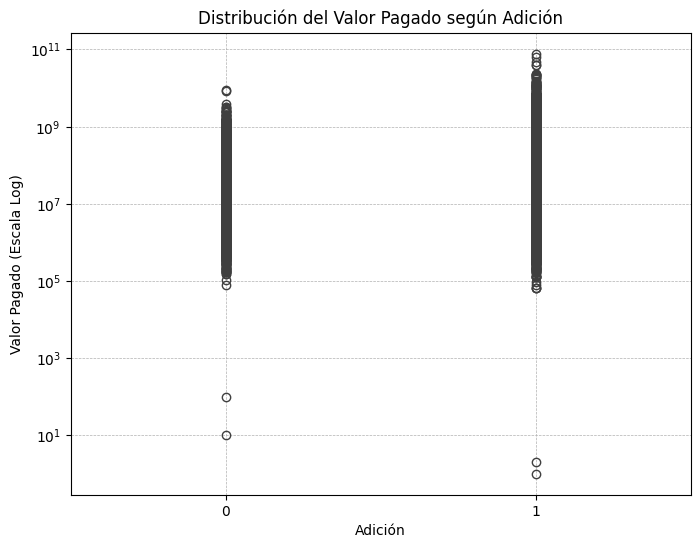

In [ ]:

# Asegurar que 'valor pagado' es numérico
df['valor pagado'] = pd.to_numeric(df['valor pagado'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pagado', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pagado', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pagado (Escala Log)')
plt.title('Distribución del Valor Pagado según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


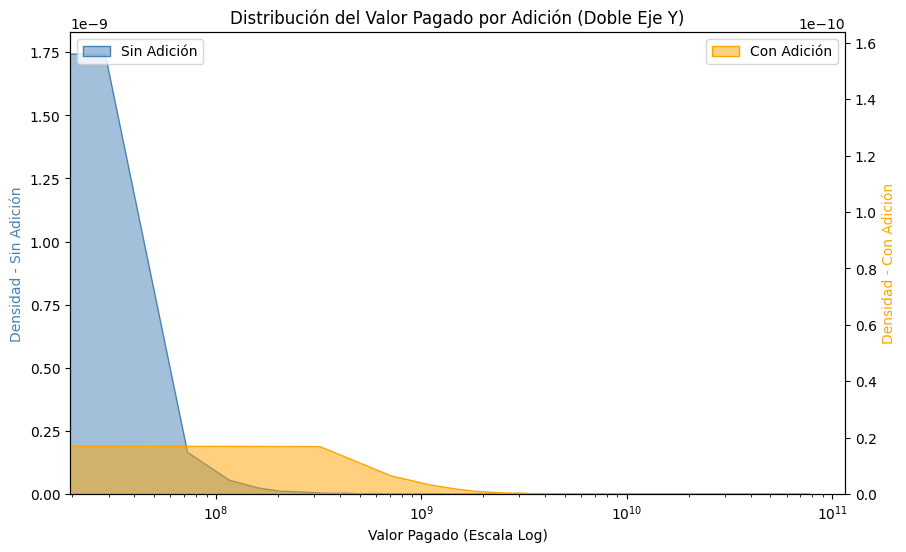

In [ ]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor pagado'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor pagado'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Pagado (Escala Log)')
ax1.set_title('Distribución del Valor Pagado por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable Valor Amortizado

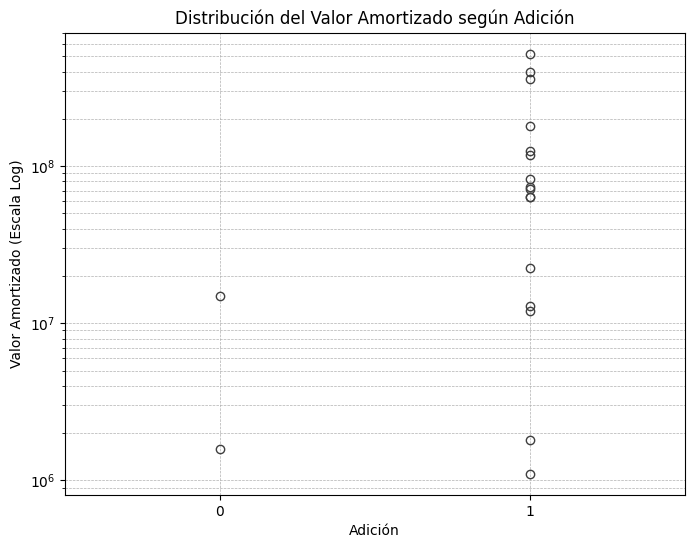

In [ ]:
# Asegurar que 'valor amortizado' es numérico
df['valor amortizado'] = pd.to_numeric(df['valor amortizado'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor amortizado', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor amortizado', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Amortizado (Escala Log)')
plt.title('Distribución del Valor Amortizado según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


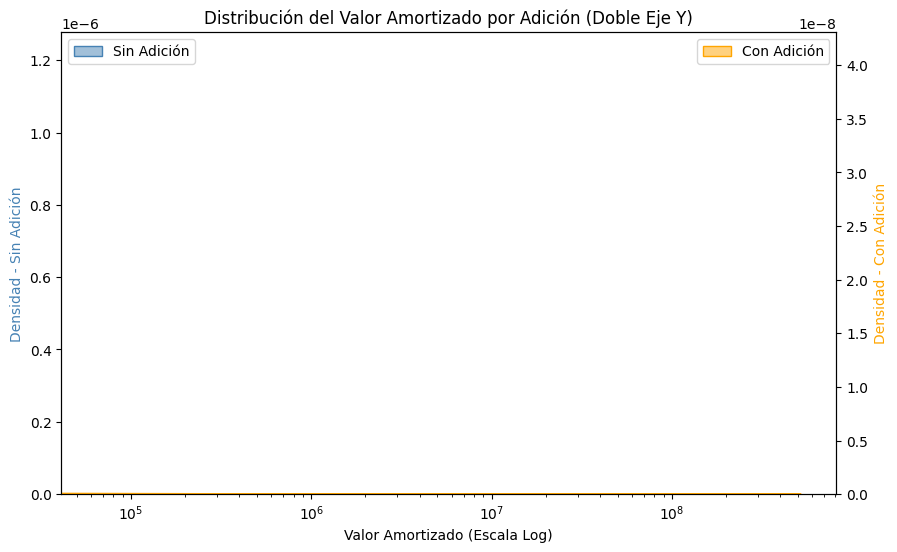

In [ ]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor amortizado'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor amortizado'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Amortizado (Escala Log)')
ax1.set_title('Distribución del Valor Amortizado por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable valor pendiente de amortizacion

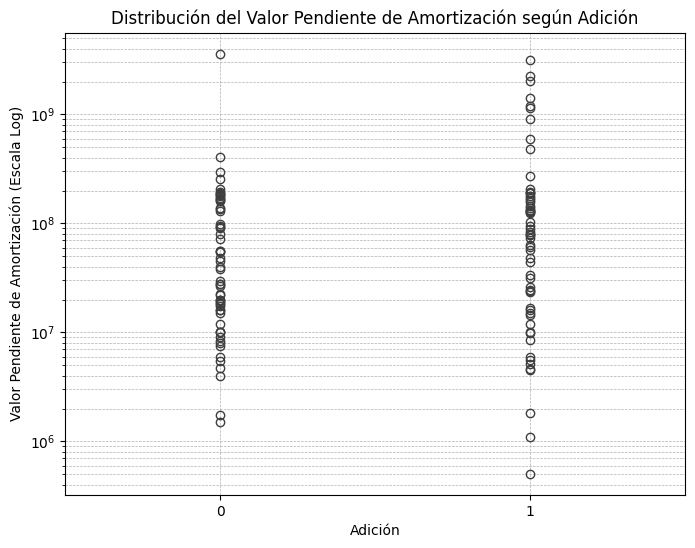

In [ ]:

# Asegurar que 'valor pendiente de amortizacion' es numérico
df['valor pendiente de amortizacion'] = pd.to_numeric(df['valor pendiente de amortizacion'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pendiente de amortizacion', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de amortizacion', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Amortización (Escala Log)')
plt.title('Distribución del Valor Pendiente de Amortización según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


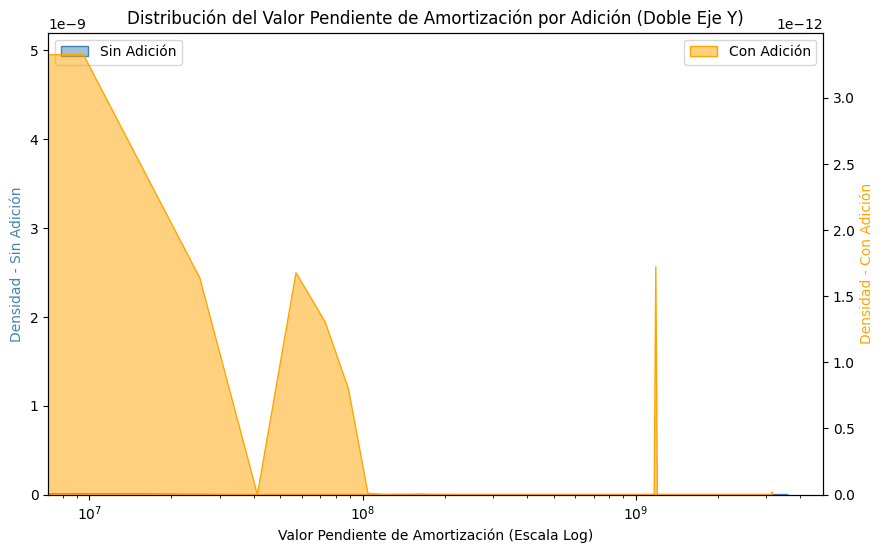

In [ ]:

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor pendiente de amortizacion'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor pendiente de amortizacion'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Pendiente de Amortización (Escala Log)')
ax1.set_title('Distribución del Valor Pendiente de Amortización por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable valor pendiente de ejecucion

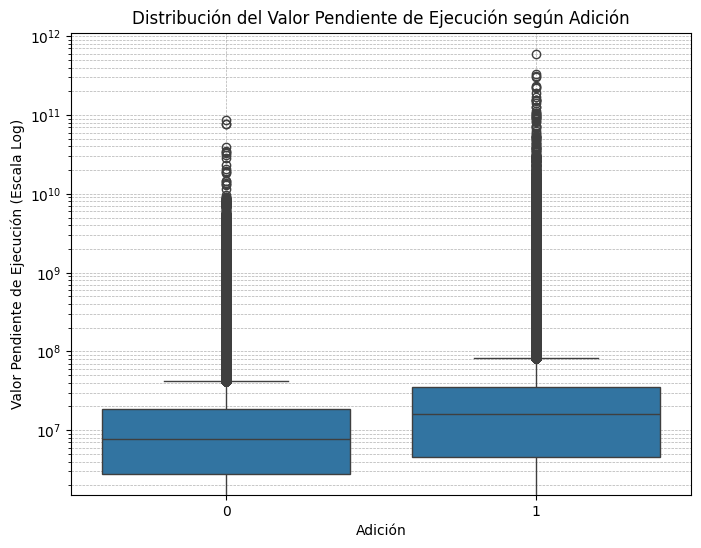

In [ ]:


# Asegurar que 'valor pendiente de ejecucion' es numérico
df['valor pendiente de ejecucion'] = pd.to_numeric(df['valor pendiente de ejecucion'], errors='coerce')

# Filtrar NaN
df_valido = df[['valor pendiente de ejecucion', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='valor pendiente de ejecucion', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Valor Pendiente de Ejecución (Escala Log)')
plt.title('Distribución del Valor Pendiente de Ejecución según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


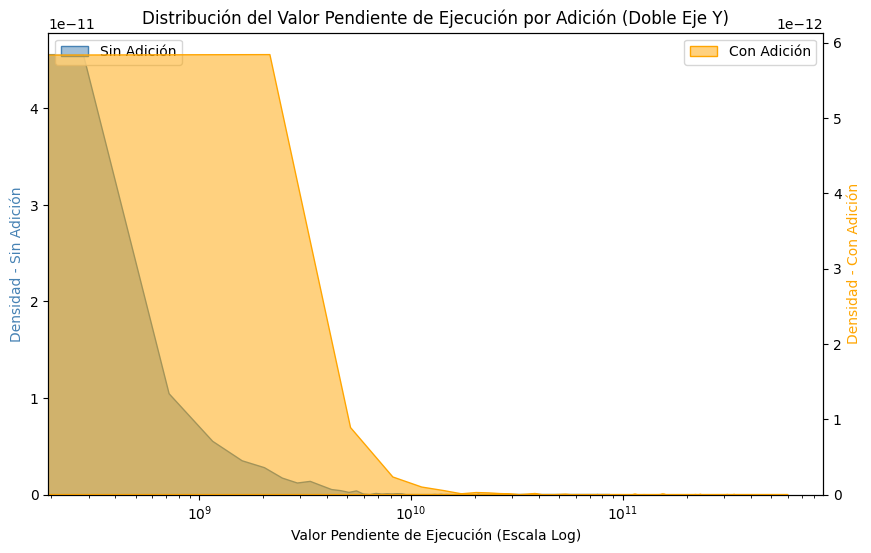

In [ ]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['valor pendiente de ejecucion'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['valor pendiente de ejecucion'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Valor Pendiente de Ejecución (Escala Log)')
ax1.set_title('Distribución del Valor Pendiente de Ejecución por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable estado bpin

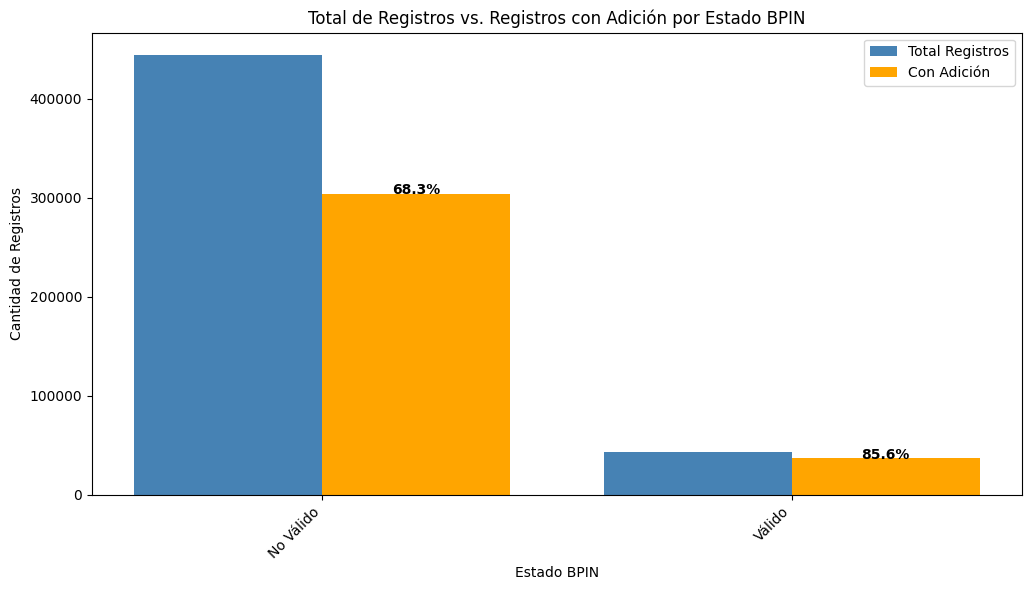

In [ ]:

# Contar total de registros por estado bpin
total_por_bpin = df['estado bpin'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_bpin = df[df['Adicion'] == 1]['estado bpin'].value_counts()

# Unir ambas series en un DataFrame
df_bpin = pd.DataFrame({'Total Registros': total_por_bpin, 'Con Adición': adicion_por_bpin}).fillna(0)

# Calcular el porcentaje de adición
df_bpin["% Adición"] = (df_bpin["Con Adición"] / df_bpin["Total Registros"]) * 100

# Configurar posiciones para barras
x = np.arange(len(df_bpin))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Barras Total Registros
bars1 = ax.bar(x - width/2, df_bpin['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras Con Adición
bars2 = ax.bar(x + width/2, df_bpin['Con Adición'], width, label='Con Adición', color='orange')

# Añadir % Adición sobre barras
for i, v in enumerate(df_bpin["% Adición"]):
    ax.text(x[i] + width/2, df_bpin["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_bpin.index, rotation=45, ha='right')
ax.set_xlabel("Estado BPIN")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Estado BPIN")
ax.legend()

# Mostrar gráfica
plt.show()


Variable código bpin

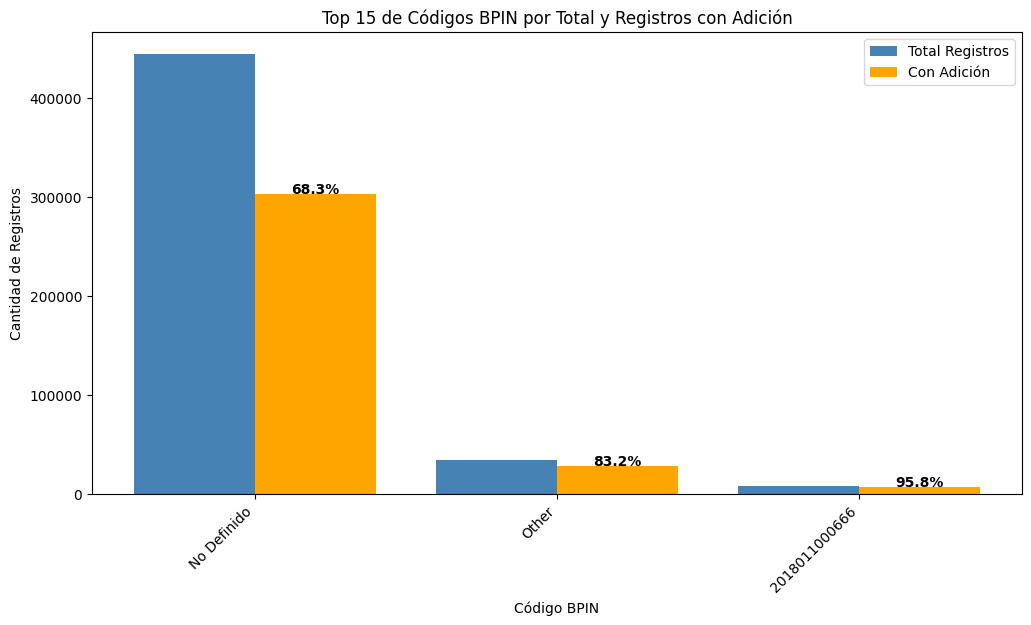

In [122]:


# Contar total de registros por código bpin
total_por_bpin = df['código bpin'].value_counts()

# Contar solo los registros con Adición = 1
adicion_por_bpin = df[df['Adicion'] == 1]['código bpin'].value_counts()

# Unir ambas series en un DataFrame
df_bpin = pd.DataFrame({'Total Registros': total_por_bpin, 'Con Adición': adicion_por_bpin}).fillna(0)

# Filtrar solo códigos BPIN que se repiten más de una vez
df_bpin = df_bpin[df_bpin['Total Registros'] > 1]

# Calcular el porcentaje de adición
df_bpin["% Adición"] = (df_bpin["Con Adición"] / df_bpin["Total Registros"]) * 100

# Tomar los 15 códigos con más registros
df_bpin = df_bpin.sort_values('Total Registros', ascending=False).head(15)

# Configurar las posiciones de las barras
x = np.arange(len(df_bpin))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_bpin['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_bpin['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_bpin["% Adición"]):
    ax.text(x[i] + width/2, df_bpin["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_bpin.index, rotation=45, ha="right")
ax.set_xlabel("Código BPIN")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Top 15 de Códigos BPIN por Total y Registros con Adición")
ax.legend()

# Mostrar la gráfica
plt.show()

Variable anno bpin

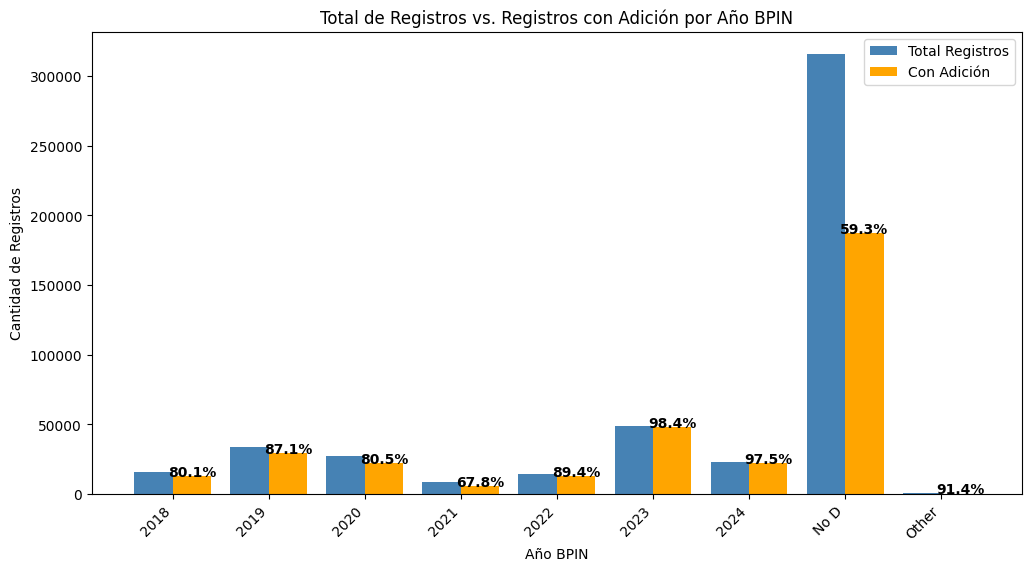

In [123]:
# Contar total de registros por año bpin
total_por_annobpin = df['anno bpin'].value_counts().sort_index()

# Contar solo los registros con Adicion = 1
adicion_por_annobpin = df[df['Adicion'] == 1]['anno bpin'].value_counts().sort_index()

# Unir ambas series en un DataFrame
df_annobpin = pd.DataFrame({'Total Registros': total_por_annobpin, 'Con Adición': adicion_por_annobpin}).fillna(0)

# Calcular el porcentaje de adición
df_annobpin["% Adición"] = (df_annobpin["Con Adición"] / df_annobpin["Total Registros"]) * 100

# Configurar las posiciones de las barras
x = np.arange(len(df_annobpin))
width = 0.4

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barras de Total Registros
bars1 = ax.bar(x - width/2, df_annobpin['Total Registros'], width, label='Total Registros', color='steelblue')

# Barras de Con Adición
bars2 = ax.bar(x + width/2, df_annobpin['Con Adición'], width, label='Con Adición', color='orange')

# Agregar el porcentaje de adición sobre cada barra de "Con Adición"
for i, v in enumerate(df_annobpin["% Adición"]):
    ax.text(x[i] + width/2, df_annobpin["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Configuración del gráfico
ax.set_xticks(x)
ax.set_xticklabels(df_annobpin.index, rotation=45, ha="right")
ax.set_xlabel("Año BPIN")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Año BPIN")
ax.legend()

# Mostrar la gráfica
plt.show()


Variable saldo cdp

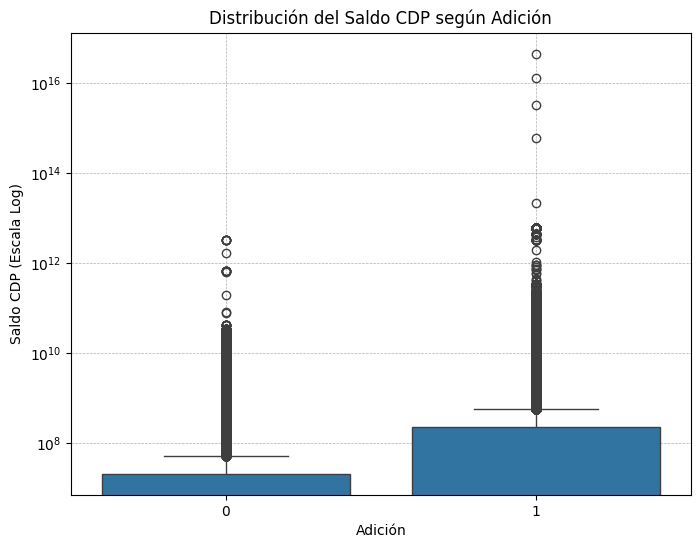

In [125]:

# Asegurar que 'saldo cdp' es numérico
df['saldo cdp'] = pd.to_numeric(df['saldo cdp'], errors='coerce')

# Filtrar NaN
df_valido = df[['saldo cdp', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='saldo cdp', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Saldo CDP (Escala Log)')
plt.title('Distribución del Saldo CDP según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


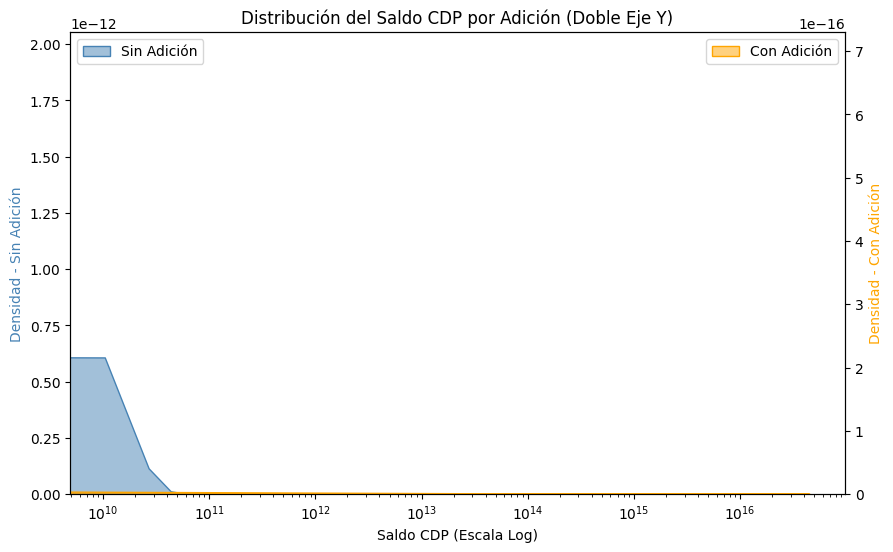

In [126]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['saldo cdp'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['saldo cdp'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Saldo CDP (Escala Log)')
ax1.set_title('Distribución del Saldo CDP por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable saldo vigencia

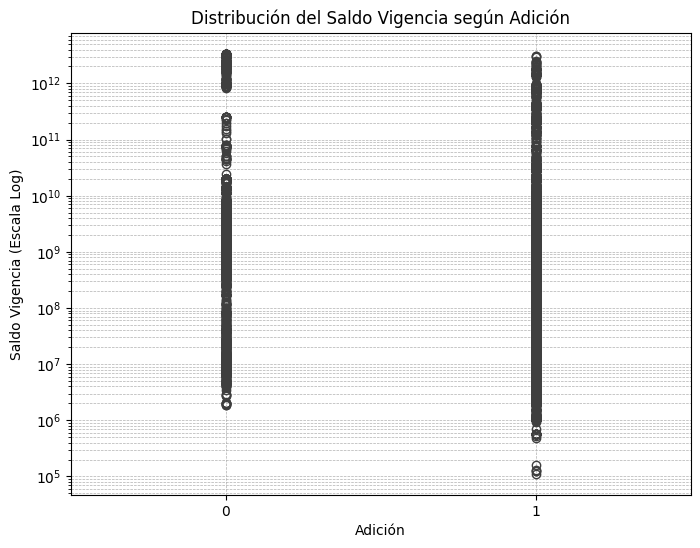

In [127]:

# Asegurar que 'saldo vigencia' es numérico
df['saldo vigencia'] = pd.to_numeric(df['saldo vigencia'], errors='coerce')

# Filtrar NaN
df_valido = df[['saldo vigencia', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='saldo vigencia', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Saldo Vigencia (Escala Log)')
plt.title('Distribución del Saldo Vigencia según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


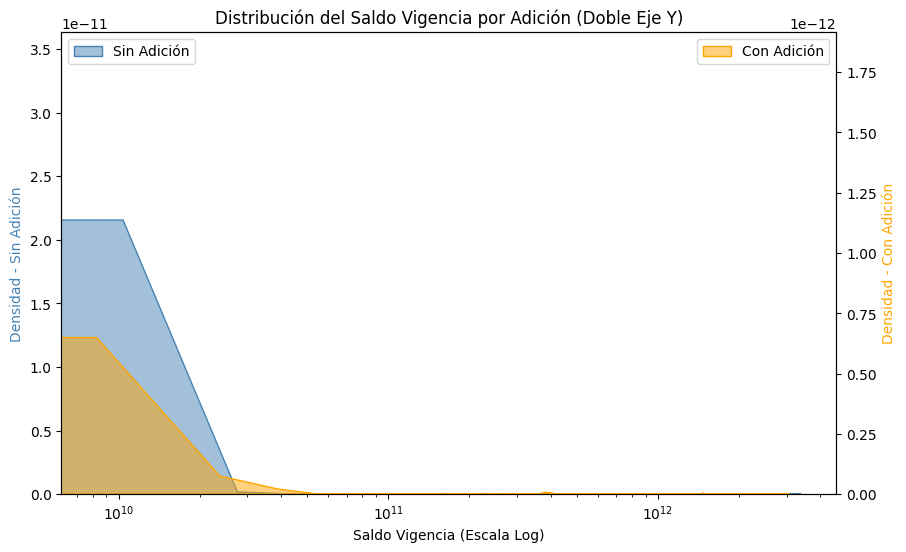

In [128]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['saldo vigencia'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['saldo vigencia'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Saldo Vigencia (Escala Log)')
ax1.set_title('Distribución del Saldo Vigencia por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable espostconflicto

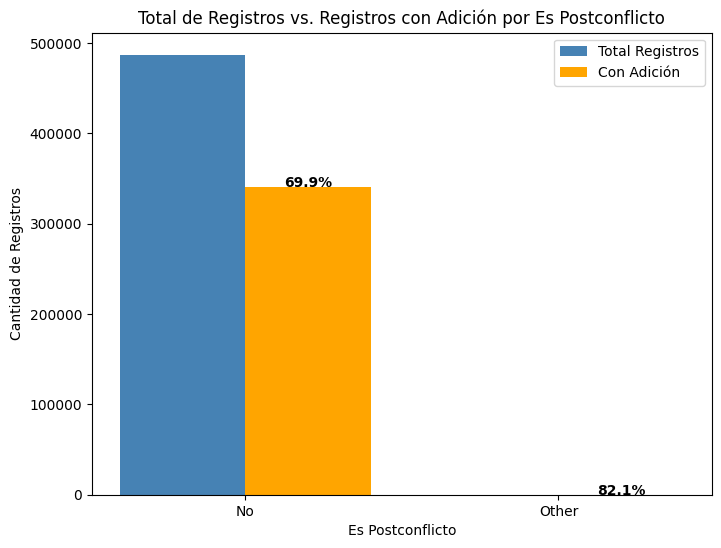

In [129]:
# Contar total de registros por espostconflicto
total_por_postconflicto = df['espostconflicto'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_postconflicto = df[df['Adicion'] == 1]['espostconflicto'].value_counts()

# Unir ambas series en un DataFrame
df_postconflicto = pd.DataFrame({'Total Registros': total_por_postconflicto, 'Con Adición': adicion_por_postconflicto}).fillna(0)

# Calcular el porcentaje de adición
df_postconflicto["% Adición"] = (df_postconflicto["Con Adición"] / df_postconflicto["Total Registros"]) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_postconflicto))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, df_postconflicto['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_postconflicto['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_postconflicto["% Adición"]):
    ax.text(x[i] + width/2, df_postconflicto["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_postconflicto.index, rotation=0)
ax.set_xlabel("Es Postconflicto")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Es Postconflicto")
ax.legend()

# Mostrar gráfica
plt.show()


Variable dias adicionados

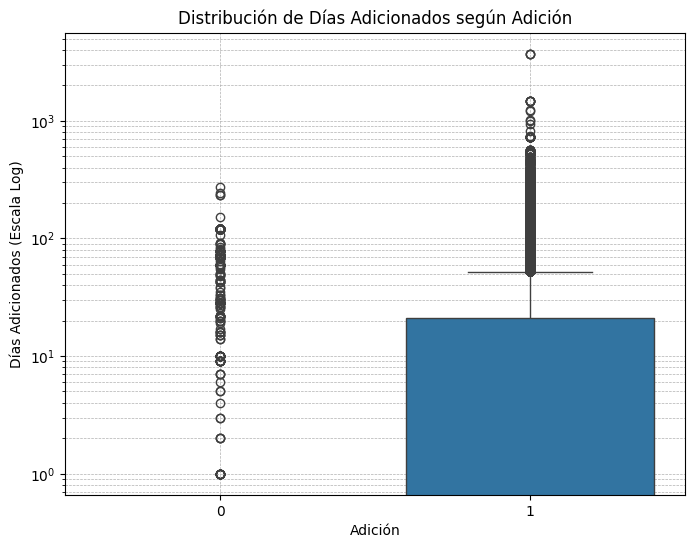

In [130]:
# Asegurar que 'dias adicionados' es numérico
df['dias adicionados'] = pd.to_numeric(df['dias adicionados'], errors='coerce')

# Filtrar NaN
df_valido = df[['dias adicionados', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='dias adicionados', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Días Adicionados (Escala Log)')
plt.title('Distribución de Días Adicionados según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


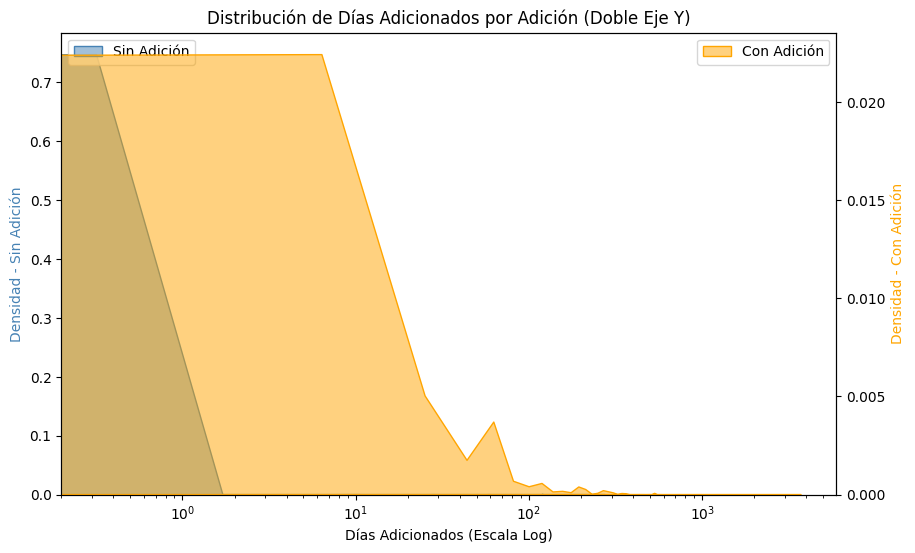

In [131]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['dias adicionados'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['dias adicionados'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Días Adicionados (Escala Log)')
ax1.set_title('Distribución de Días Adicionados por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable puntos del acuerdo

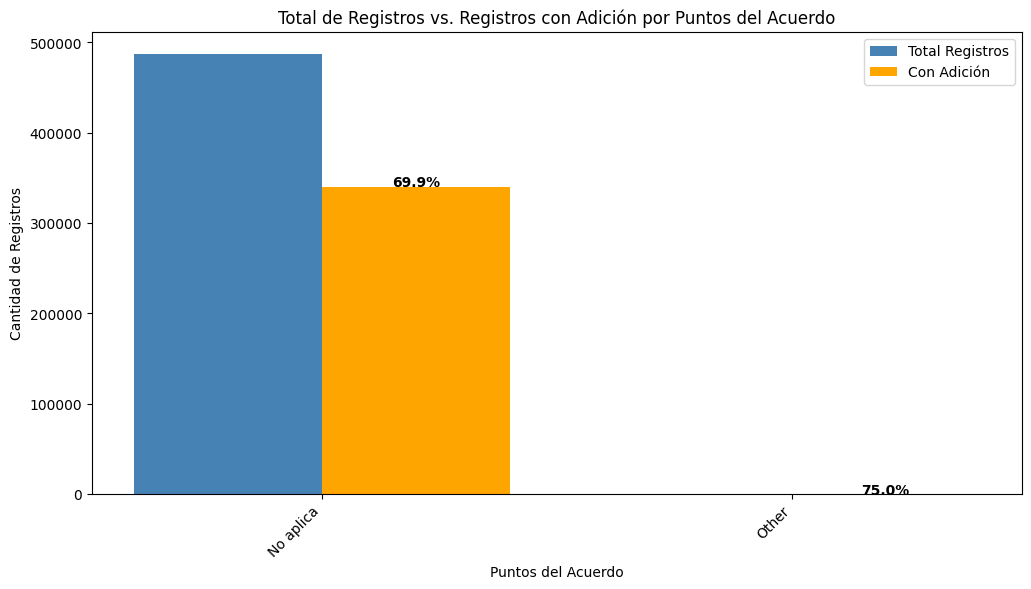

In [133]:
# Contar total de registros por puntos del acuerdo
total_por_puntos = df['puntos del acuerdo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_puntos = df[df['Adicion'] == 1]['puntos del acuerdo'].value_counts()

# Unir ambas series en un DataFrame
df_puntos = pd.DataFrame({'Total Registros': total_por_puntos, 'Con Adición': adicion_por_puntos}).fillna(0)

# Calcular el porcentaje de adición
df_puntos["% Adición"] = (df_puntos["Con Adición"] / df_puntos["Total Registros"]) * 100

# Tomar solo los más relevantes (por ejemplo, los 15 más comunes)
df_puntos = df_puntos.sort_values('Total Registros', ascending=False).head(15)

# Configurar posiciones para las barras
x = np.arange(len(df_puntos))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_puntos['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_puntos['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_puntos["% Adición"]):
    ax.text(x[i] + width/2, df_puntos["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_puntos.index, rotation=45, ha="right")
ax.set_xlabel("Puntos del Acuerdo")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Puntos del Acuerdo")
ax.legend()

# Mostrar gráfica
plt.show()


Variable pilares del acuerdo

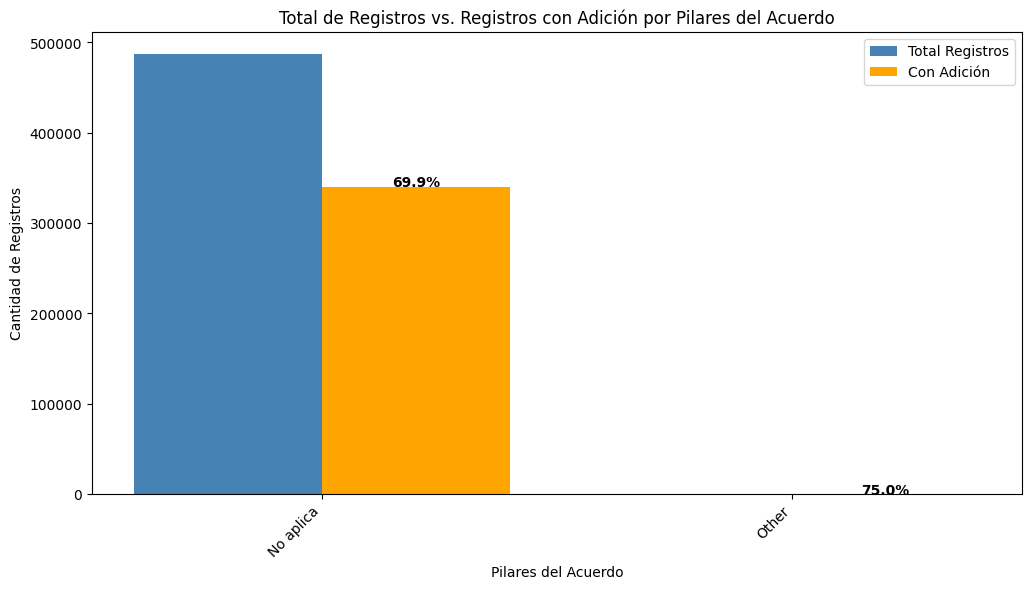

In [134]:
# Contar total de registros por pilares del acuerdo
total_por_pilares = df['pilares del acuerdo'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_pilares = df[df['Adicion'] == 1]['pilares del acuerdo'].value_counts()

# Unir ambas series en un DataFrame
df_pilares = pd.DataFrame({'Total Registros': total_por_pilares, 'Con Adición': adicion_por_pilares}).fillna(0)

# Calcular el porcentaje de adición
df_pilares["% Adición"] = (df_pilares["Con Adición"] / df_pilares["Total Registros"]) * 100

# Tomar solo los más relevantes (por ejemplo, los 15 más comunes)
df_pilares = df_pilares.sort_values('Total Registros', ascending=False).head(15)

# Configurar posiciones para las barras
x = np.arange(len(df_pilares))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_pilares['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_pilares['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_pilares["% Adición"]):
    ax.text(x[i] + width/2, df_pilares["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_pilares.index, rotation=45, ha="right")
ax.set_xlabel("Pilares del Acuerdo")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Pilares del Acuerdo")
ax.legend()

# Mostrar gráfica
plt.show()


Variable nombre representante legal

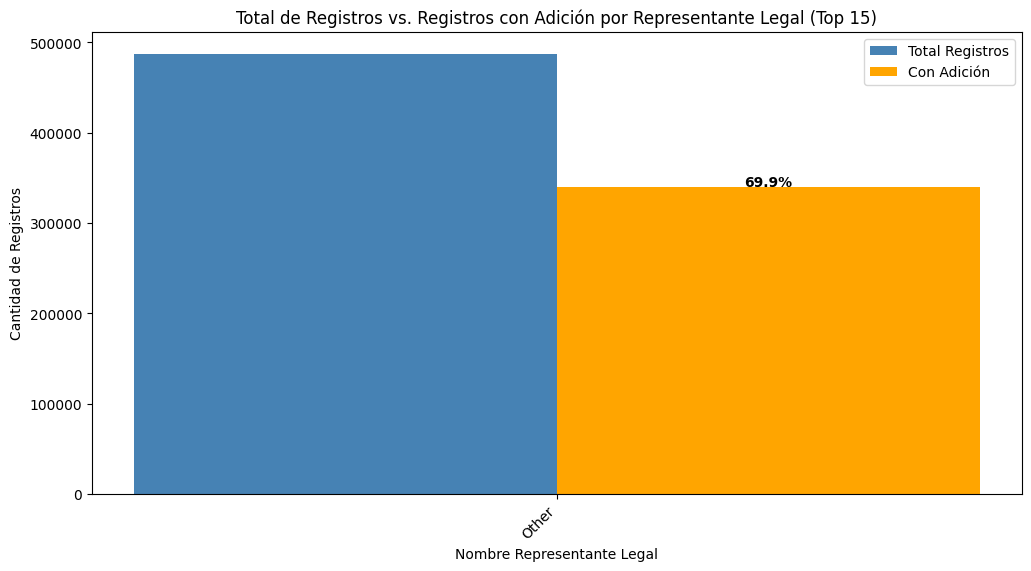

In [137]:
# Contar total de registros por nombre representante legal
total_por_representante = df['nombre representante legal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_representante = df[df['Adicion'] == 1]['nombre representante legal'].value_counts()

# Unir ambas series en un DataFrame
df_representante = pd.DataFrame({'Total Registros': total_por_representante, 'Con Adición': adicion_por_representante}).fillna(0)

# Filtrar solo los más frecuentes (ejemplo: top 15)
df_representante = df_representante.sort_values('Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_representante["% Adición"] = (df_representante["Con Adición"] / df_representante["Total Registros"]) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_representante))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_representante['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_representante['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_representante["% Adición"]):
    ax.text(x[i] + width/2, df_representante["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_representante.index, rotation=45, ha="right")
ax.set_xlabel("Nombre Representante Legal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Representante Legal (Top 15)")
ax.legend()

# Mostrar gráfica
plt.show()


Variable nacionalidad representante legal

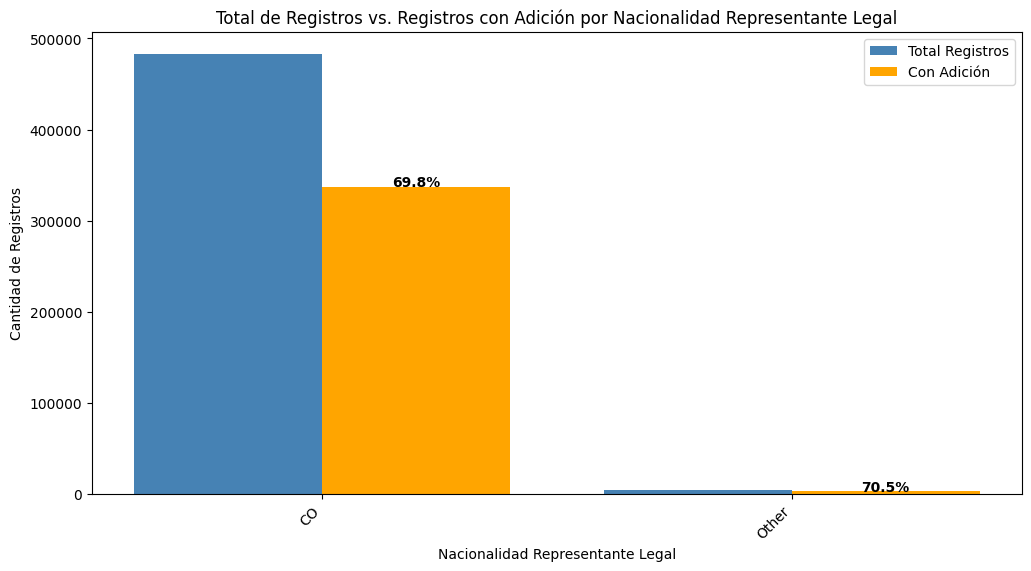

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Contar total de registros por nacionalidad
total_por_nacionalidad = df['nacionalidad representante legal'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_nacionalidad = df[df['Adicion'] == 1]['nacionalidad representante legal'].value_counts()

# Unir ambas series en un DataFrame
df_nacionalidad = pd.DataFrame({'Total Registros': total_por_nacionalidad, 'Con Adición': adicion_por_nacionalidad}).fillna(0)

# Calcular el porcentaje de adición
df_nacionalidad["% Adición"] = (df_nacionalidad["Con Adición"] / df_nacionalidad["Total Registros"]) * 100

# Tomar solo las más relevantes (por ejemplo, las 15 más comunes)
df_nacionalidad = df_nacionalidad.sort_values('Total Registros', ascending=False).head(15)

# Configurar posiciones para las barras
x = np.arange(len(df_nacionalidad))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_nacionalidad['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_nacionalidad['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_nacionalidad["% Adición"]):
    ax.text(x[i] + width/2, df_nacionalidad["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_nacionalidad.index, rotation=45, ha="right")
ax.set_xlabel("Nacionalidad Representante Legal")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Nacionalidad Representante Legal")
ax.legend()

# Mostrar gráfica
plt.show()


Variable presupuesto general de la nacion – pgn

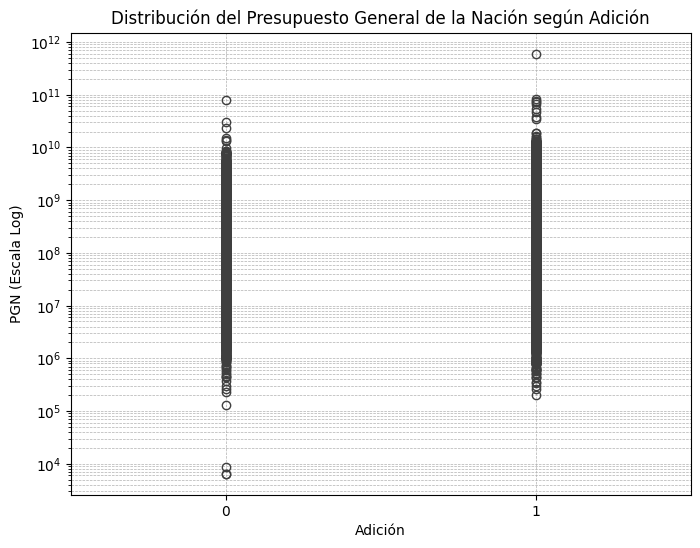

In [139]:
# Asegurar que 'presupuesto general de la nacion – pgn' es numérico
df['presupuesto general de la nacion – pgn'] = pd.to_numeric(df['presupuesto general de la nacion – pgn'], errors='coerce')

# Filtrar NaN
df_valido = df[['presupuesto general de la nacion – pgn', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='presupuesto general de la nacion – pgn', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('PGN (Escala Log)')
plt.title('Distribución del Presupuesto General de la Nación según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


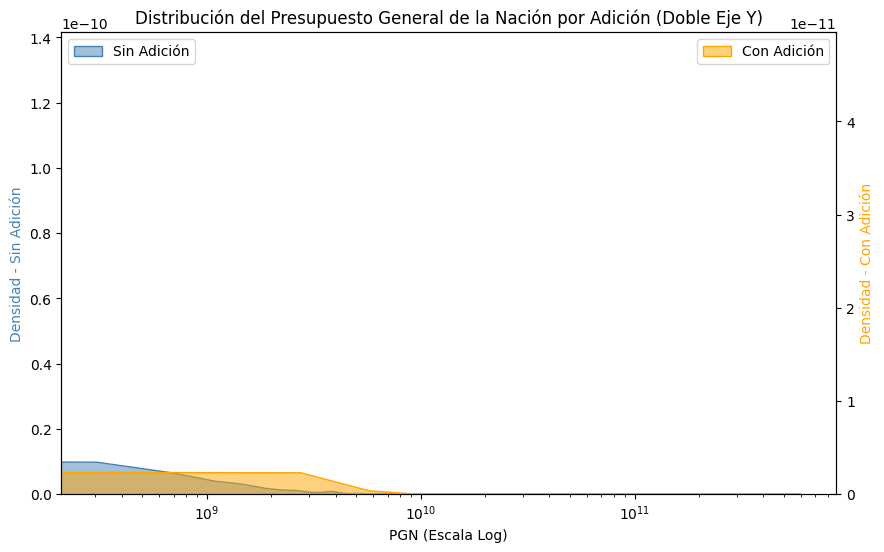

In [140]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['presupuesto general de la nacion – pgn'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['presupuesto general de la nacion – pgn'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('PGN (Escala Log)')
ax1.set_title('Distribución del Presupuesto General de la Nación por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable sistema general de participaciones

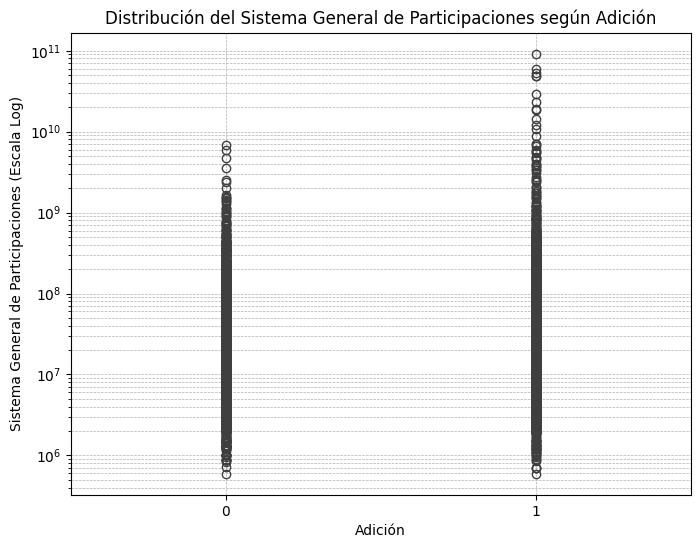

In [141]:
# Asegurar que 'sistema general de participaciones' es numérico
df['sistema general de participaciones'] = pd.to_numeric(df['sistema general de participaciones'], errors='coerce')

# Filtrar NaN
df_valido = df[['sistema general de participaciones', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='sistema general de participaciones', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Sistema General de Participaciones (Escala Log)')
plt.title('Distribución del Sistema General de Participaciones según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


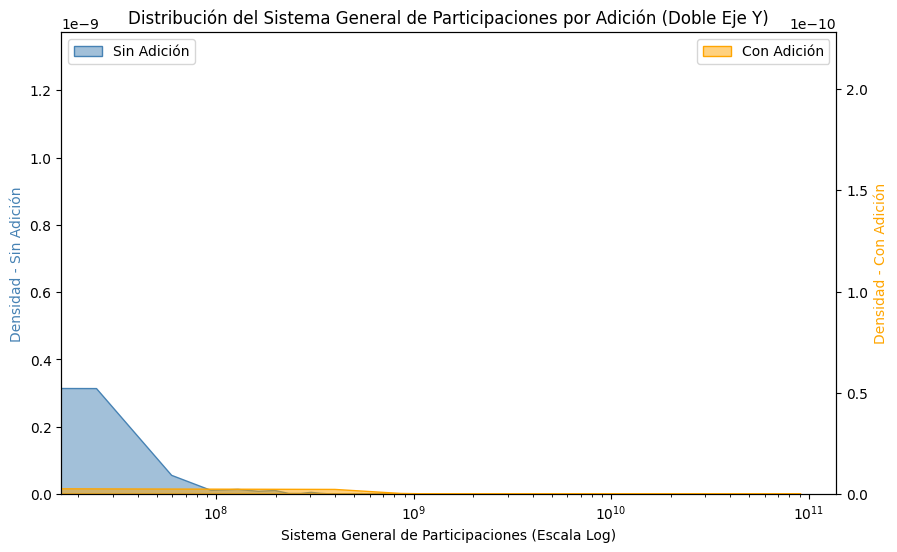

In [142]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['sistema general de participaciones'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['sistema general de participaciones'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Sistema General de Participaciones (Escala Log)')
ax1.set_title('Distribución del Sistema General de Participaciones por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable sistema general de regalías

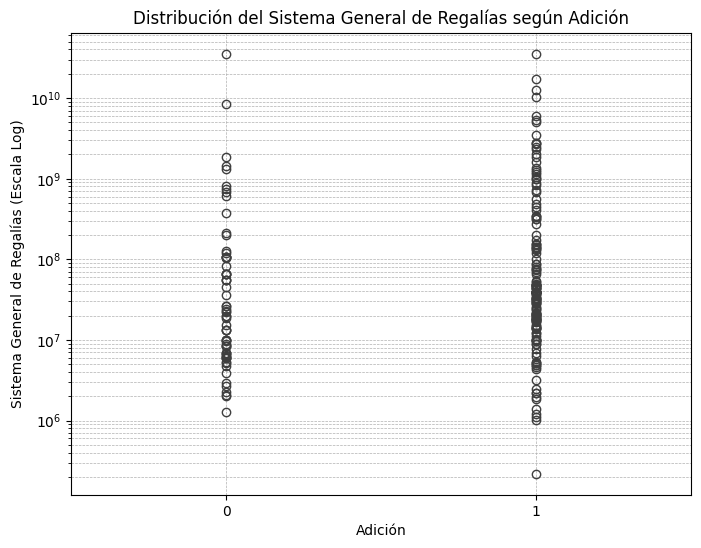

In [143]:
# Asegurar que 'sistema general de regalías' es numérico
df['sistema general de regalías'] = pd.to_numeric(df['sistema general de regalías'], errors='coerce')

# Filtrar NaN
df_valido = df[['sistema general de regalías', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='sistema general de regalías', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Sistema General de Regalías (Escala Log)')
plt.title('Distribución del Sistema General de Regalías según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


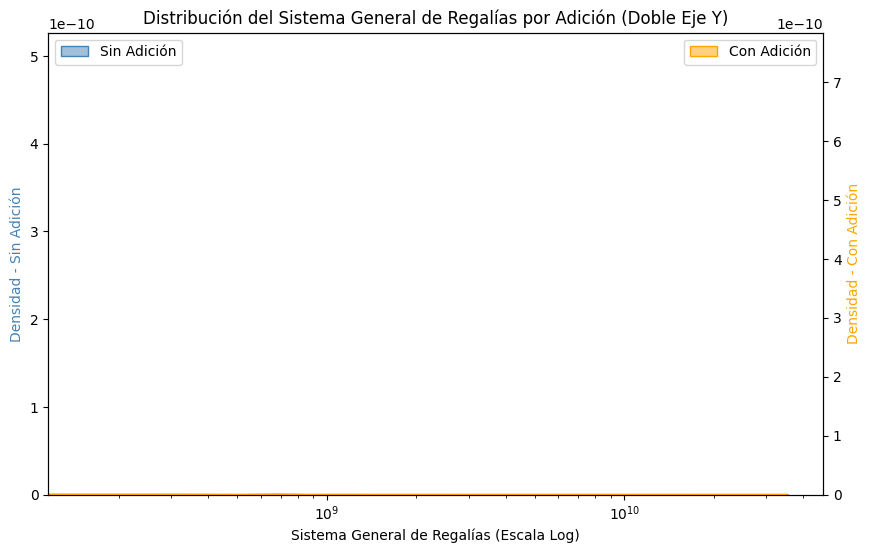

In [144]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['sistema general de regalías'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['sistema general de regalías'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Sistema General de Regalías (Escala Log)')
ax1.set_title('Distribución del Sistema General de Regalías por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable recursos propios (alcaldias_gobernaciones_resguardosindigenas)

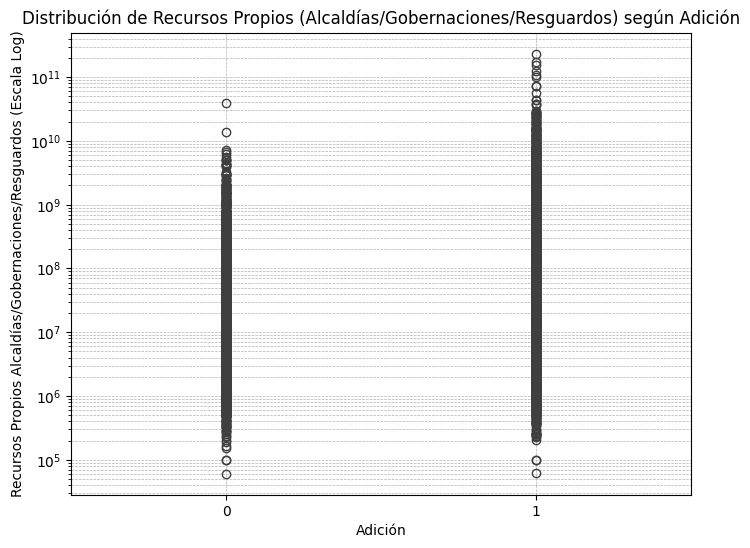

In [145]:
# Asegurar que 'recursos propios (alcaldias_gobernaciones_resguardosindigenas)' es numérico
df['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'] = pd.to_numeric(df['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'], errors='coerce')

# Filtrar NaN
df_valido = df[['recursos propios (alcaldias_gobernaciones_resguardosindigenas)', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='recursos propios (alcaldias_gobernaciones_resguardosindigenas)', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Recursos Propios Alcaldías/Gobernaciones/Resguardos (Escala Log)')
plt.title('Distribución de Recursos Propios (Alcaldías/Gobernaciones/Resguardos) según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


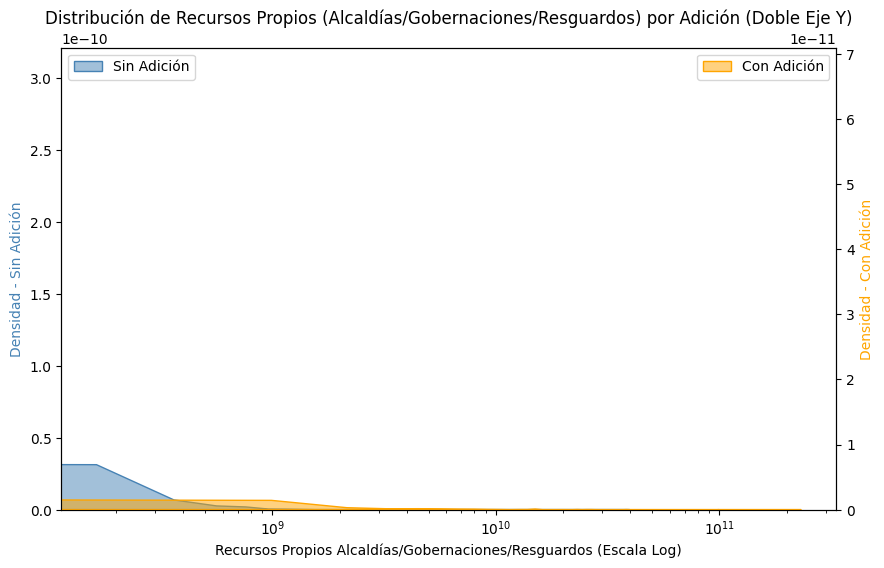

In [146]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['recursos propios (alcaldias_gobernaciones_resguardosindigenas)'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Recursos Propios Alcaldías/Gobernaciones/Resguardos (Escala Log)')
ax1.set_title('Distribución de Recursos Propios (Alcaldías/Gobernaciones/Resguardos) por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable recursos de credito

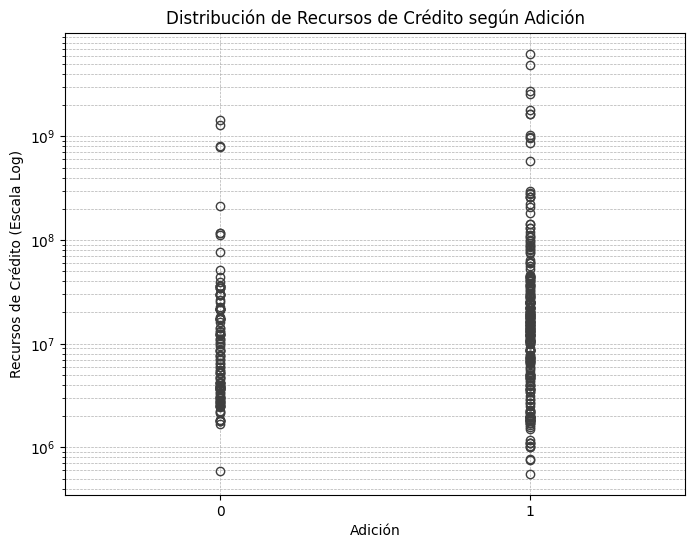

In [149]:
# Asegurar que 'recursos de credito' es numérico
df['recursos de credito'] = pd.to_numeric(df['recursos de credito'], errors='coerce')

# Filtrar NaN
df_valido = df[['recursos de credito', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='recursos de credito', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Recursos de Crédito (Escala Log)')
plt.title('Distribución de Recursos de Crédito según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


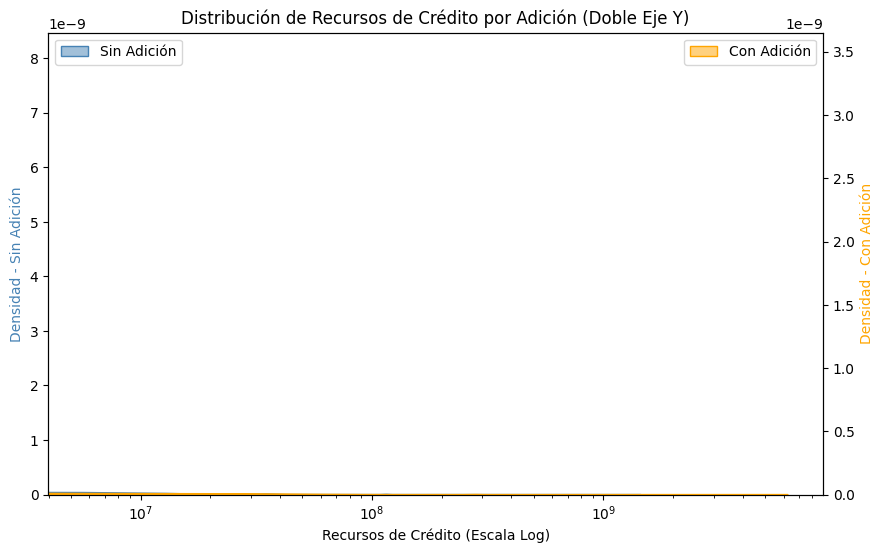

In [150]:
# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['recursos de credito'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['recursos de credito'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Recursos de Crédito (Escala Log)')
ax1.set_title('Distribución de Recursos de Crédito por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable recursos propios

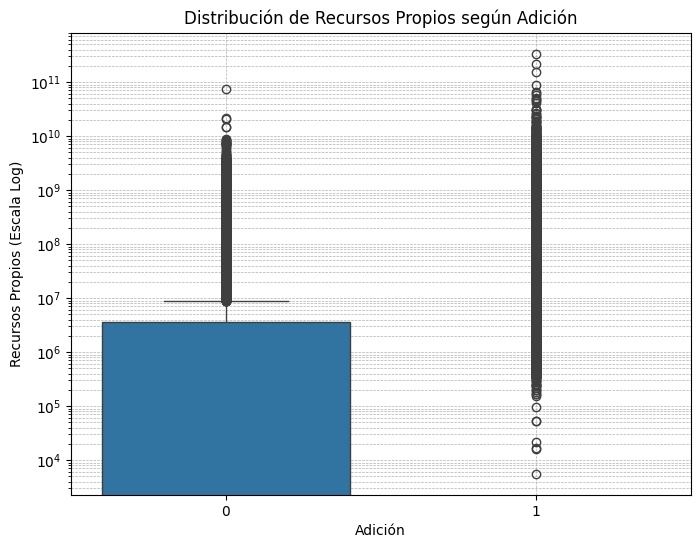

In [151]:

# Asegurar que 'recursos propios' es numérico
df['recursos propios'] = pd.to_numeric(df['recursos propios'], errors='coerce')

# Filtrar NaN
df_valido = df[['recursos propios', 'Adicion']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Adicion', y='recursos propios', data=df_valido)
plt.yscale('log')
plt.xlabel('Adición')
plt.ylabel('Recursos Propios (Escala Log)')
plt.title('Distribución de Recursos Propios según Adición')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


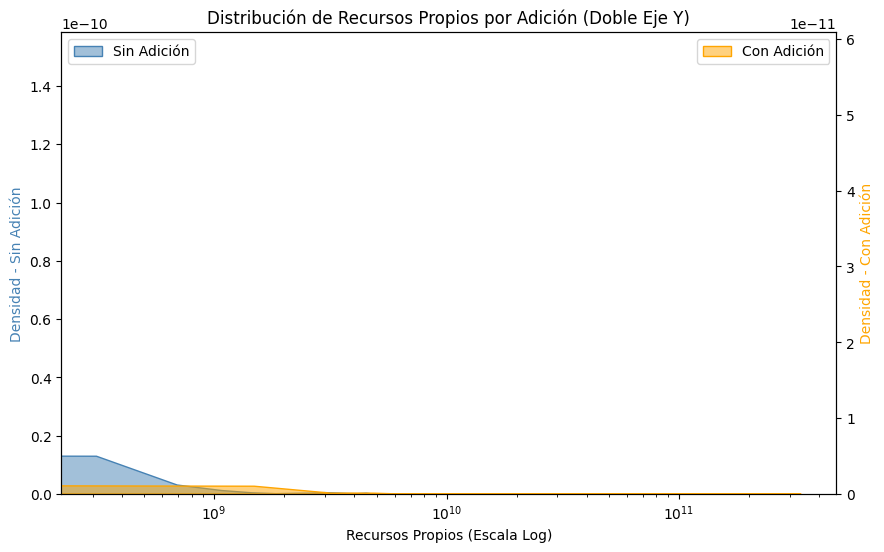

In [152]:

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# KDE Sin Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 0]['recursos propios'], ax=ax1, fill=True, color='steelblue', alpha=0.5, label='Sin Adición')

# KDE Con Adición
sns.kdeplot(df_valido[df_valido['Adicion'] == 1]['recursos propios'], ax=ax2, fill=True, color='orange', alpha=0.5, label='Con Adición')

# Personalizar ejes
ax1.set_ylabel('Densidad - Sin Adición', color='steelblue')
ax2.set_ylabel('Densidad - Con Adición', color='orange')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('Recursos Propios (Escala Log)')
ax1.set_title('Distribución de Recursos Propios por Adición (Doble Eje Y)')

# Ajustar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfica
plt.show()


Variable codigo entidad

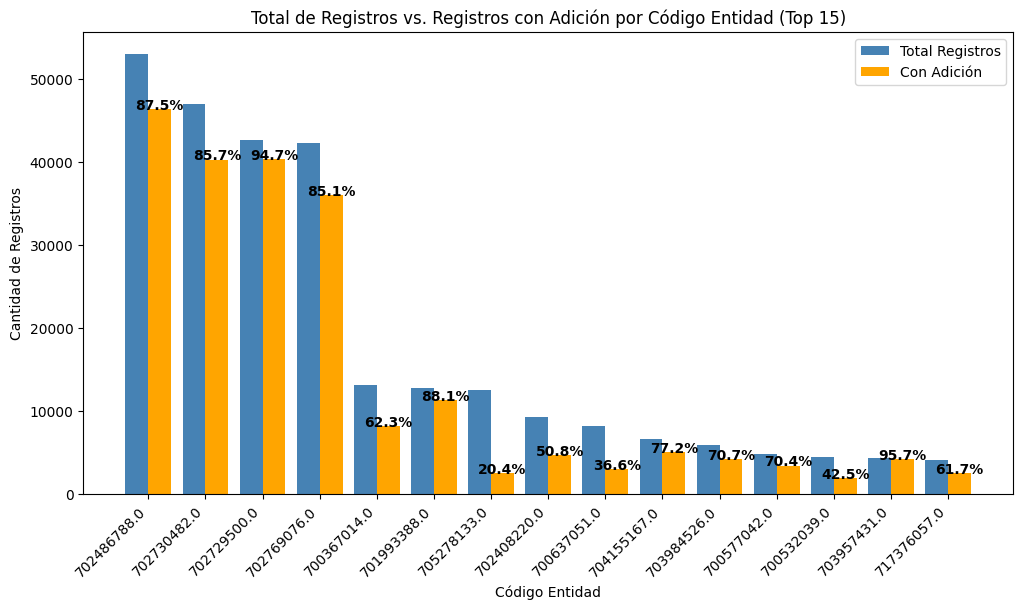

In [154]:
# Contar total de registros por código entidad
total_por_codigo = df['codigo entidad'].value_counts()

# Contar solo los registros con Adicion = 1
adicion_por_codigo = df[df['Adicion'] == 1]['codigo entidad'].value_counts()

# Unir ambas series en un DataFrame
df_codigo = pd.DataFrame({'Total Registros': total_por_codigo, 'Con Adición': adicion_por_codigo}).fillna(0)

# Tomar solo los más frecuentes (ejemplo: top 15)
df_codigo = df_codigo.sort_values('Total Registros', ascending=False).head(15)

# Calcular el porcentaje de adición
df_codigo["% Adición"] = (df_codigo["Con Adición"] / df_codigo["Total Registros"]) * 100

# Configurar posiciones para las barras
x = np.arange(len(df_codigo))
width = 0.4

# Crear gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, df_codigo['Total Registros'], width, label='Total Registros', color='steelblue')
bars2 = ax.bar(x + width/2, df_codigo['Con Adición'], width, label='Con Adición', color='orange')

# Agregar porcentaje sobre las barras
for i, v in enumerate(df_codigo["% Adición"]):
    ax.text(x[i] + width/2, df_codigo["Con Adición"].iloc[i] + 5, f"{v:.1f}%", ha="center", fontsize=10, color="black", fontweight="bold")

# Personalizar ejes
ax.set_xticks(x)
ax.set_xticklabels(df_codigo.index, rotation=45, ha="right")
ax.set_xlabel("Código Entidad")
ax.set_ylabel("Cantidad de Registros")
ax.set_title("Total de Registros vs. Registros con Adición por Código Entidad (Top 15)")
ax.legend()

# Mostrar gráfica
plt.show()


Variable duración del contrato

In [158]:
df["duración del contrato"]


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
487207   NaN
487208   NaN
487209   NaN
487210   NaN
487211   NaN
Name: duración del contrato, Length: 487212, dtype: float64

### División de categoricas y númericas

In [ ]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns


In [ ]:
catcols

In [ ]:
#No cuentan como duplicados debido a que los contratos pueden ser parecido pero se diferencian por la entidad, id contrato, etc que ya fueron eliminados

duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

In [ ]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

In [ ]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

## Selección variables importantes con metodo de xgboost y RF

In [ ]:
# Separar variables independientes y dependiente
X = df.drop('adicion', axis=1)
y = df['adicion']

In [ ]:
# Identificar columnas categóricas y numéricas
catcols = [col for col in X.columns if X[col].dtype == 'object']
numcols = [col for col in X.columns if col not in catcols]

# Codificar las columnas categóricas
label_encoders = {}
for col in catcols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].fillna('Desconocido').astype(str))
    label_encoders[col] = le



### Random Forest

In [ ]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener las importancias y almacenarlas en un DataFrame
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})
# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_random = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con RF más importantes son:")
print(top_10_features_random)


### XGBOOST

In [ ]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Obtener las importancias de las variables
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})

# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 más importantes
top_10_features_xgboost = feature_importance_df.head(10)

# Mostrar el resultado
print("Las 10 variables con xgboost más importantes son:")
print(top_10_features_xgboost)

### Listado final y generacion de df

In [ ]:
# Lista de variables importantes que quieres conservar
variables_importantes = ["estado contrato", "anno bpin", "estado bpin","destino gasto","orden","ciudad","tiempo duracion (dias)","obligación ambiental","recursos_propios_alcaldias_gobernaciones_resguardos","justificacion modalidad de contratacion"] 
variables_importantes.append("adicion")
# Eliminar todas las columnas excepto las de la lista 'variables_importantes'
df_importantes = df[variables_importantes]


In [ ]:
df_importantes

## Dummies

In [ ]:
catcols2=[]
for i in catcols:
    if i in variables_importantes:
        catcols2.append(i)

In [ ]:
catcols2

In [ ]:

# Codificación de variables categóricas
df_dummies = pd.get_dummies(df_importantes, columns=catcols2, dtype=int, drop_first=True)

# Identificar las categorías excluidas
excluded_categories = {}
for col in catcols2:
    unique_values = df_importantes[col].unique()
    excluded_categories[col] = unique_values[0]  # La primera categoría es la excluida

# Mostrar las categorías excluidas
print("Categorías excluidas por multicolinealidad:")
for col, category in excluded_categories.items():
    print(f"{col}: {category}")

# Visualizar el DataFrame con variables dummies
df_dummies


In [ ]:


cols = [col for col in df_dummies.columns if col != "adicion"] + ["adicion"]
df_dummies = df_dummies[cols]

# Mostrar el DataFrame con la columna 'adiciones' al final
df_dummies.head()


## Limpieza datos atipicos, etc

In [ ]:
X=df_dummies
var_ret=[]
for i in X.columns:
    if X[i].sum() <6068: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         var_ret.append(i)

# Eliminar las columnas del dataframe
df_dummies.drop(columns=var_ret, inplace=True)


print(var_ret)
print(len(var_ret))


df_dummies.columns

In [ ]:
df_dummies